# Respirable

According to the World Health Organization (WHO), 92% of the population breathes air that exceeds the WHO guideline limits. Industry, transport systems, power generation and waste incineration cause particularly high levels of air pollutants, forming a threat to health and climate. Pollutants increase the risk of getting respiratory as well as other diseases. Additionally, they worsen the condition of e.g. asthma or Covid-19 patients.Regarding the climate, the pollutants increase the greenhouse effect and negatively affect the earth's climate and ecosystem.
The current pandemic shows that environmental-friendly measures have an impact on the urban air pollution. Countries used a different way to control the propagation of the virus, some of them enforced lockdowns while others just issued social distance measures. Those measures lead to a reduction of traffic and work in factories, diminishing the emission of air pollutants compared to previous data.
The idea of this project is to analyze the reduction of air pollution in the following cities: Barcelona, Bogotá, Münster, Paris, Stockholm and Stuttgart that issued different measures to contain the spread of the Coronavirus. After the "air pollutants" analysis we use the data collected by The World Air Quality Project website to predict the PM2.5 as well as PM10 concentration by using the time series of air pollutants and weather variables.
The World Air Quality Project website collects data from different Environmental Protection Agencies around the world and calculates the Air Quality Index (AQI) using the nowcast system, developed by the Environmental Protection Agency of USA. The website published a compilation of data, which will be updated 3 times per day and covers about 380 cities from January 2020 until now. We are also going to use the 2018 and 2019 data to make the comparison between that year and the current year. To make the prediction we will use the 2019 data alongside the 2020 data until 05-10-2020.
The data for each city is based on the average of several stations. The data set provides min, max, median (average) and standard deviation of each pollutant species and meteorological data. The count column is the number of samples used for calculating the median and standard deviation.

## How does this project benefit the new normal in a post COVID-19 society?

Becoming a greener planet includes the necessity to improve the worldwide air quality so nobody has to breathe air, exceeding the WHO guideline limits. By being able to predict the concentration of PM2.5 and PM10, being the most important pollutants due to their health impacts and their use to describe and determine the level of air pollution in cities, we can inform the community about the increase or decrease in pollution levels. Thus they can take actions that reduce the health impact on the most vulnerable people and simultaneously improve the air quality by implementing environmental-friendly measures.

## Introduction to the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('dark')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df18 = pd.read_csv('/home/jovyan/work/AQ2018H1.csv', skiprows=4, parse_dates=['Date'])
df18.head()

Date Country    City Specie  count   min   max  median  variance
0 2018-04-19      HR  Zagreb   pm10     72  12.0  66.0    19.0   1034.64
1 2018-05-03      HR  Zagreb   pm10     72   5.0  46.0    20.0    740.53
2 2018-05-08      HR  Zagreb   pm10     69   7.0  33.0    17.0    286.35
3 2018-05-31      HR  Zagreb   pm10     48  15.0  60.0    25.0    704.61
4 2018-06-22      HR  Zagreb   pm10     62   1.0  60.0     7.0    670.06

In [ ]:
df18['Specie'].unique()

array(['pm10', 'temperature', 'wind-speed', 'wind-gust', 'co', 'o3',
       'so2', 'no2', 'humidity', 'pressure', 'pm25', 'precipitation',
       'wd', 'd', 'uvi', 'aqi', 'pol', 'pm1', 'mepaqi'], dtype=object)

As the datatset is saved in an unfavorable way, we transform it by putting every pollutant and weather variable in columns. Firstly, we select the data for each city and we then develop a function that runs the metionned process (select city and put every pollutant and weather variable in columns). In the following part, the variables for the analysis as well as prediction part are shown: 

|Analysis|Prediction|
|:----------:|:-------------------:|
|PM10 - Particulate Matter under 10 microns|PM2.5/PM10|
|CO - Carbon Oxide|avg humidity|
|O3 - Ozone|min temperature|
|SO2 - Sulfur Dioxide|max temperature|
|NO2 - Nitrogen Dioxide|wind speed|
|PM2.5 - Particulate Matter under 2.5 microns|avg/max precipitation|
|PM1 - Particulate Matter under 1.0 microns||
|||


**PM:** It stands for Particulate Matter and is used to describe a mixture of solid particles and liquid droplets, which is found in the air. PM is caused by different sources such as constructions, unpaved roads, fields, smokestacks, fires, fuel combustion. These particles have different sizes, shapes and can be made up of different chemical compounds. There are three sizes that are important regarding air pollution:
* PM10: These particles have a size under 10 micrometers (µm) and they are mainly formed by inorganic compounds, dust, ash, metallic particulates, silicates, aluminates, heavy metals and organic matter, which are associated to carbon particulates e.g. soot.
If humans expose themselves to heavy concentrations of PM10, they might suffer from coughing, wheezing, asthma attacks, bronchitis, high blood pressure, heart attacks, strokes or premature death. The World Health Organization sets a limit concentration of 50 μg/m3 in a 24 hour period.

* PM2.5: These particles have a size under 2.5 μm and it is the standard index of urban pollution, because its origin is particularly anthropogenic. PM2.5 is driven by the emissions of diesel vehicles. Particles of this range can travel deeply into the respiratory tract reaching the lungs. The exposure to these particles can cause short term health effects like eye, nose, throat and lung irritation, coughing and shortness of breath. They can also worsen medical conditions like asthma and heart disease. The WHO sets a limit concentration of 25 μg/m3 in a 24 hour period.

* PM1: The particulate matter under 1.0 μm are extremely fine particles that gained a huge interest in the environmental science area in the recent years. They are driven by factories, vehicles emissions, construction activities and other sources. Due to their small size, they are really difficult to disperse and they can penetrate into the blood stream. There isn't a limit concentration yet because they are measured with PM2.5, but different studies have concluded that the concentration of these types of particles need to be measured.

**CO:** Carbon Monoxide is a temporary pollutant, induced by internal combustion engines and incomplete combustion of fuel (diesel, gas, wood...), in urban areas. This pollutant forms photochemical smog, which is the chemical reaction between sunlight, nitrogen oxides and volatile organic compounds in the atmosphere, and is one of the ozone producers. High concentrations of CO can be seen from space. This gas can be toxic to humans in closed spaces, the WHO recommends a limit of 8 ppm for 8 hours and 28 ppm in 1 hour.

**O3:** Ozone can be found in the upper atmosphere, where it generates a protective layer that shields the earth from ultraviolet rays. However, on ground level, this gas can trigger different health problems like chest pain, throat irritation, airway inflammation. Also, it can reduce the lung function and can harm the lung tissues. The symptoms of patients with bronchitis, emphysema and asthma can be worsen. Furthermore, it can negatively impact the vegetation and ecosystems. Ground level ozone or tropospheric ozone comes from the reaction between nitrogen oxides, volatile organic compounds, carbon monoxide and sunlight. It is also known as a secondary pollutant. The WHO recommends a limit of 100μg/m3 in a 8h period.

**SO2:** Sulfur Dioxide is one of the principal products of Diesel combustion and other fossil fuels, but is also found in volcans. This gas can affect the habitat suitability for plants communities as well as animal life. Also, it is a precursor to acid rain. It can be toxic in high concentration. Different studies have concluded that exposure to sulfur dioxide is associated with preterm birth. The WHO recommends a limit of 20μg/m3 in 24 hours and 500μg/m3 in 10 min.

**NO2:** Nitrogen Dioxide is part of the group of related gases, called Nitrogen Oxides (NOx). This pollutant is built, when fossil fuels such as coal, oil, gas or diesel are burned at high temperatures. It also contributes to the formation of Ozone in the atmosphere. Humans can suffer from a wide range of harmful effects like inflammation of airways, cough, wheezing, reduced lung function, increased of asthma attacks. Recent studies have associated NO2 as one of the causes of child asthma. Another one showed that the survival of lung cancer patient is shortened, if they are exposed to this air pollutant. Higher levels of NO2 can be found on high traveler roads. The WHO recommends a limit exposure of 40μg/m3 per year and 200μg/m3 in one hour.

**Wind Direction:** This weather parameter indicates the direction from which the wind is generated. It uses a 360° scale where, 0°(360°) indicates north to south direction and 90° indicates west to east direction. It is an important parameter, because it allows to infer the sources of pollutants.

**Wind Speed**: It is a fundamental atmospheric quantity, caused by the movement of air from high to low pressure, usually due to changes in temperature. At low speed pollutants do not disperse and the concentration increases, while at high wind speed the pollutants disperse and the concentration decreases.

**Ultraviolet Index:** UVI is the international standard of the measurement of the strength of sunburn-producing ultraviolet radiation at a particular place and time. As earlier mentioned, UV rays are an important member in the reaction of NOx in the atmosphere to create Ozone. Besides being used in air pollution, it is also warn people to use sun protection.

**Humidity, Temperature and Pressure:** Humidity is defined as the water vapor, presented on air. 
Temperature is defined as the amount of heat in a body or place.
Pressure is the force, exercised over a surface by the air above it, while gravity pulls it to earth. 
These three weather parameters are part of the causes of inversion layer, which is a weather phenomena that changes the direction of the flux of air. In normal conditions, hot air tends to go up in the atmosphere to get cold, this is known as temperature gradient, however when the inversion happens the temperature gradient is inverted and cold air gets near to the surface of the earth and this reduces the upgoing air currents, which leads to the increase of pollutant concentrations.

**AQI:** The Air Quality Index is a way to communicate to the public how polluted the air is or will be. It is an easier way to explain the air pollution level than using the common values, expressed in parts per million (ppm) or micrograms per cubic meter (μg/m3). However, there is not an unified way to calculate the AQI, because countries have different air regulations and air quality standards. The World Air Quality Project uses the 2016 US EPA Air Quality Index scale. This index is divided into six categories that indicate different levels of concern. 
One of the advantages of this index is that its formula can be used for the all selected pollutants (PM2.5, PM10, O3, SO2, NO2, CO).
The formula, used to calculate the index is written and explained in the following part: 

$$
I = \frac{I_{high} - I_{low}} {C_{high} - C_{low}} (C - C_{low}) + I_{low}
$$

Where:

$$I =$$ AQI

$$C =$$ Pollutant concentration

$$C_{low} =$$ Concentration breakpoint that is  $$\leq$$ C

$$C_{high} =$$ Concentration breakpoint that is $$\geq$$ C

$$I_{low} =$$ Index breakpoint corresponding to $$C_{low}$$

$$I_{high} =$$ Index breakpoint corresponding to $$C_{high}$$

EPA's table of breakpoints is:

|$$O_{3}$$ (ppb)|$$O_{3}$$ (ppb)|PM2.5 (μg/m3)|PM10 (μg/m3)|CO (ppm)|$$SO_{2}$$ (ppb)|$$NO_{2}$$ (ppb)|AQI|AQI|
|---------------|---------------|-------------|------------|--------|----------------|----------------|---|---|
|$$C_{low} - C_{high}$$ (avg)|$$C_{low} - C_{high}$$ (avg)|$$C_{low} - C_{high}$$ (avg)|$$C_{low} - C_{high}$$ (avg)|$$C_{low} - C_{high}$$ (avg)|$$C_{low} - C_{high}$$ (avg)|$$C_{low} - C_{high}$$ (avg)|$$I_{low} - I_{high}$$|Category|
|0 - 54 (8 hr)|-|0.0 - 12.0 (24 h)|0 - 54 (24 hr)|0.0 - 4.4 (8 hr)|0 - 35 (1 h)|0 - 53 (1 hr)|0 - 50|Good|
|55 - 70 (8 hr)|-|12.1 - 35.4 (24 hr)|55 - 154 (24 hr)|4.5 - 9.4 (8 hr)|36 - 75 (1 hr)|54 - 100 (1 hr)|51 - 100|Moderate|
|71 - 85 (8 hr)|125 - 164 (1 hr)|35.5 - 55.4 (24 hr)|155 - 254 (24 hr)|9.5 - 12.4 (8 hr)|76 - 185 (1 hr)|101 - 360 (1 hr)|101 - 150|Unhealthy for sensitive groups|
|86 - 10 (8 hr)|165 - 204 (1 hr)|55-5 - 150.4 (24 hr)|255 - 354 (24 hr)|12.5 - 15.4 (8 hr)|186 - 304 (1 hr)|361 - 649 (1 hr)|151 - 200|Unhealthy|
|106 - 200 (8 hr)|205 - 404 (1 hr)|150.5 - 250.4 (24 hr)|355 - 424 (24 hr)|15.5 - 30.4 (8 hr)|305 - 604 (24 hr)|650 - 1249 (1 hr)|201 - 300|Very Unhealthy|
|-|405 - 504 (1 hr)|250.5 - 350.4 (24 hr)|425 - 504 (24 hr)|30.5 - 40.4 (8 hr)|605 - 804 (24 hr)|1250 - 1649 (1 hr)|301 - 400|Hazardous|
|-|505 - 604 (1 hr)|350.5 - 500.4 (24 hr)|505 - 604 (24 hr)|40.5 - 50.4 (8 hr)|805 - 1004 (24 hr)|1650 - 2049 (1 hr)|401 - 500|Hazardous|

Let's assume that a monitor records a 24 hour average concentration of PM2.5 of 30 μg/m3, the equation should look like this

$$
\frac{100 - 51}{35.4 - 12.1} (30 - 12.1) + 51 = 88.6
$$

The result corresponds to air quality in the moderate range. To conclude, the EPA has developed a [calculator](https://www.airnow.gov/aqi/aqi-calculator-concentration/) to convert concentration to AQI.

## Data Cleaning

### Data Cleaning 2018 DataFrame

In [ ]:
df18 = pd.read_csv('/home/jovyan/work/AQ2018H1.csv', skiprows=4, parse_dates=['Date'])
df18.head()

Date Country    City Specie  count   min   max  median  variance
0 2018-04-19      HR  Zagreb   pm10     72  12.0  66.0    19.0   1034.64
1 2018-05-03      HR  Zagreb   pm10     72   5.0  46.0    20.0    740.53
2 2018-05-08      HR  Zagreb   pm10     69   7.0  33.0    17.0    286.35
3 2018-05-31      HR  Zagreb   pm10     48  15.0  60.0    25.0    704.61
4 2018-06-22      HR  Zagreb   pm10     62   1.0  60.0     7.0    670.06

#### Extracting and Cleaning Data from Barcelona

In [ ]:
barcelona = df18[df18['City'] == 'Barcelona']
barcelona.head()

Date Country       City      Specie  count  min   max  median  \
28706 2018-06-18      ES  Barcelona  wind-speed    138  0.1   8.8     1.8   
28707 2018-06-19      ES  Barcelona  wind-speed    149  0.1   8.3     1.8   
28708 2018-05-17      ES  Barcelona  wind-speed     71  0.1   7.0     2.0   
28709 2018-06-09      ES  Barcelona  wind-speed    110  0.1   9.0     1.3   
28710 2018-06-12      ES  Barcelona  wind-speed    157  0.1  13.1     2.6   

       variance  
28706     39.57  
28707     45.37  
28708     28.15  
28709     43.01  
28710     99.26

In [ ]:
barcelona['Specie'].unique()

array(['wind-speed', 'pm10', 'o3', 'no2', 'so2', 'temperature',
       'humidity', 'pressure', 'wind-gust'], dtype=object)

After extracting the Barcelona’s data, we need to extract the data for each pollutant and weather variable that we are going to use from the “Specie” column. Then, we pivot the table to have the different variables in different columns. In this way it is easier to analyze the data and it can be used on a Machine Learning model. As not all cities have the same variables available, we need to use different variables according to their availability in the respective city dataset.

In [ ]:
#For Wind Speed
pm = barcelona[barcelona['Specie'] == 'pm10'].copy() #So we don't modify the original barcelona DF
pm.head()

Date Country       City Specie  count   min   max  median  \
28752 2018-06-17      ES  Barcelona   pm10    151  15.0  29.0    20.0   
28753 2018-06-28      ES  Barcelona   pm10    191  16.0  50.0    28.0   
28754 2018-01-09      ES  Barcelona   pm10    186   9.0  87.0    15.0   
28755 2018-02-14      ES  Barcelona   pm10    176   9.0  30.0    15.0   
28756 2018-03-16      ES  Barcelona   pm10    157   8.0  20.0    14.0   

       variance  
28752     91.92  
28753    614.25  
28754   2040.11  
28755    211.70  
28756    107.11

In [ ]:
#Pivot table
pm = pd.pivot_table(data=pm, values=['min', 'max', 'median'], index='Date')
pm.head()

max  median  min
Date                         
2018-01-01  17.0    11.0  8.0
2018-01-02  25.0    15.0  9.0
2018-01-03  29.0    14.0  7.0
2018-01-04  20.0    13.0  3.0
2018-01-05  69.0    14.0  5.0

After pivoting the table and droping unnecessary columns (e.g. Country, City, Count and Variance), we need to change the name of the columns in order to identify each variable.

In [ ]:
pm.rename(columns={'min':'min_{}'.format('pm10'), 'max':'max_{}'.format('pm10'), 'median':'avg_{}'.format('pm10')}, inplace=True)
pm.head()

max_pm10  avg_pm10  min_pm10
Date                                    
2018-01-01      17.0      11.0       8.0
2018-01-02      25.0      15.0       9.0
2018-01-03      29.0      14.0       7.0
2018-01-04      20.0      13.0       3.0
2018-01-05      69.0      14.0       5.0

After cleaning and transforming the data, we now know which steps the function has to contain. 

#### Writing a function to ease the cleaning process

In [ ]:
def cleaning_function(df, city, parameters):
    #This function will make all the cleaning process
    #df is each DataFrame (df18, df19, df20)
    #City we will use
    #Parameters or environmental variables, we will take from each dataframe based
    #on it's available variables

    #Basic idea:
    #1. Extracts the city
    #2. From the list of parameters, extracts each parameter
    #3. From that parameter makes a pivot, and change columns names
    #4. Takes each parameter df and merges it with an empty df
    #5. Return that new DataFrame

    city_temp = df[df['City'] == city]
    city_temp_parameters = city_temp['Specie'].unique()
    final_df = pd.DataFrame()
    for parameter in parameters:
        if parameter not in city_temp_parameters:
            print("The parameter {} doesn't exist in the dataframe and will be ignored".format(parameter))
            continue
        else:
            temp_df = city_temp[city_temp['Specie'] == parameter].copy()
            temp_df_pivot = pd.pivot_table(data=temp_df, values=['min', 'max', 'median'], index='Date')
            temp_df_pivot.rename(columns={'min':'min_{}'.format(parameter), 'max':'max_{}'.format(parameter), 'median':'avg_{}'.format(parameter)}, inplace=True)
            final_df = pd.concat([final_df, temp_df_pivot], axis=1)
    return final_df

#### Extracting and Cleaning Data from Barcelona

In [ ]:
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
barcelona_18 = cleaning_function(df18, 'Barcelona', parameters)
barcelona_18.head()

The parameter pm25 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter co doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_o3  avg_o3  min_o3  max_so2  \
Date                                                                        
2018-01-01      17.0      11.0       8.0    40.9    26.2     0.5      NaN   
2018-01-02      25.0      15.0       9.0    26.9    14.3     0.5      NaN   
2018-01-03      29.0      14.0       7.0    26.0    15.7     0.7      NaN   
2018-01-04      20.0      13.0       3.0    24.6    16.3     1.1      NaN   
2018-01-05      69.0      14.0       5.0    26.9    15.5     0.5      NaN   

            avg_so2  min_so2  max_no2  ...  min_humidity  max_pressure  \
Date                                   ...                               
2018-01-01      NaN      NaN     16.7  ...           NaN           NaN   
2018-01-02      NaN      NaN     42.1  ...           NaN           NaN   
2018-01-03      NaN      NaN     40.0  ...           NaN           NaN   
2018-01-04      NaN      NaN     41.4  ...           NaN           NaN   
2018-01-05      NaN      NaN     48.3  ...           NaN           NaN   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2018-01-01           NaN           NaN              NaN              NaN   
2018-01-02           NaN           NaN              NaN              NaN   
2018-01-03           NaN           NaN              NaN              NaN   
2018-01-04           NaN           NaN              NaN              NaN   
2018-01-05           NaN           NaN              NaN              NaN   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2018-01-01              NaN             NaN             NaN             NaN  
2018-01-02              NaN             NaN             NaN             NaN  
2018-01-03              NaN             NaN             NaN             NaN  
2018-01-04              NaN             NaN             NaN             NaN  
2018-01-05              NaN             NaN             NaN             NaN  

[5 rows x 24 columns]

In [ ]:
barcelona_18.isnull().sum()

max_pm10             2
avg_pm10             2
min_pm10             2
max_o3               0
avg_o3               0
min_o3               0
max_so2             40
avg_so2             40
min_so2             40
max_no2              0
avg_no2              0
min_no2              0
max_humidity       134
avg_humidity       134
min_humidity       134
max_pressure       134
avg_pressure       134
min_pressure       134
max_temperature    134
avg_temperature    134
min_temperature    134
max_wind-speed     134
avg_wind-speed     134
min_wind-speed     134
dtype: int64

The data from 2018 purposes only the analysis and therefore, we drop the weather features and fill NaN values with a linear interpolation in both forward and backward direction by using our developed function.  We tried different methods to fill NaN data and this method has the least variance. 

In [ ]:
barcelona_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)

In [ ]:
def missingvalue_function(city):
    city_noNan_foward = city.interpolate(method='linear',axis=1, limit_direction='forward')
    city_noNan_all = city_noNan_foward.interpolate(method='linear',axis=1,limit_direction='backward')
    #city_noNan_all.astype(int)
    return city_noNan_all

In [ ]:
barcelona_18 = missingvalue_function(barcelona_18)
barcelona_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

#### Extracting and Cleaning Data from Bogota

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
bogota_18 = cleaning_function(df18, 'Bogotá', parameters)
bogota_18.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2018-01-01      79.0      26.0       1.0     163.0      61.0       3.0   
2018-01-02      88.0      32.0       4.0     156.0      63.0       9.0   
2018-01-03      88.0      33.0       3.0     153.0      55.0       2.0   
2018-01-04     113.0      46.0       5.0     152.0      72.0       1.0   
2018-01-05     105.0      44.0       5.0     156.0      78.0      11.0   

            max_co  avg_co  min_co  max_o3  ...  min_temperature  \
Date                                        ...                    
2018-01-01    18.1     5.5     1.0     9.4  ...              NaN   
2018-01-02    20.8     7.3     1.9     8.4  ...              NaN   
2018-01-03    29.0     8.2     1.0    10.0  ...              NaN   
2018-01-04    29.0     8.2     1.9    20.8  ...              NaN   
2018-01-05    28.1     7.3     1.0    16.9  ...              NaN   

            max_wind-speed  avg_wind-speed  min_wind-speed  max_wd  avg_wd  \
Date                                                                         
2018-01-01             NaN             NaN             NaN     NaN     NaN   
2018-01-02             NaN             NaN             NaN     NaN     NaN   
2018-01-03             NaN             NaN             NaN     NaN     NaN   
2018-01-04             NaN             NaN             NaN     NaN     NaN   
2018-01-05             NaN             NaN             NaN     NaN     NaN   

            min_wd  max_uvi  avg_uvi  min_uvi  
Date                                           
2018-01-01     NaN      NaN      NaN      NaN  
2018-01-02     NaN      NaN      NaN      NaN  
2018-01-03     NaN      NaN      NaN      NaN  
2018-01-04     NaN      NaN      NaN      NaN  
2018-01-05     NaN      NaN      NaN      NaN  

[5 rows x 36 columns]

In [ ]:
bogota_18.isnull().sum()

max_pm10             5
avg_pm10             5
min_pm10             5
max_pm25             0
avg_pm25             0
min_pm25             0
max_co               4
avg_co               4
min_co               4
max_o3               4
avg_o3               4
min_o3               4
max_so2              4
avg_so2              4
min_so2              4
max_no2              6
avg_no2              6
min_no2              6
max_humidity       133
avg_humidity       133
min_humidity       133
max_pressure       133
avg_pressure       133
min_pressure       133
max_temperature    133
avg_temperature    133
min_temperature    133
max_wind-speed     134
avg_wind-speed     134
min_wind-speed     134
max_wd             134
avg_wd             134
min_wd             134
max_uvi            177
avg_uvi            177
min_uvi            177
dtype: int64

In [ ]:
bogota_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed', 'max_wd', 'avg_wd', 'min_wd', 'max_uvi', 'avg_uvi', 'min_uvi'], inplace=True)
bogota_18 = missingvalue_function(bogota_18)
bogota_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

#### Extracting and Cleaning Data from Münster

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
münster_18 = cleaning_function(df18, 'Münster', parameters)
münster_18.head()

The parameter pm25 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter co doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_o3  avg_o3  min_o3  max_so2  \
Date                                                                        
2018-01-01      18.0      13.0      11.0    32.1    28.1    18.7      NaN   
2018-01-02      15.0      11.0       5.0    26.9    17.5    11.0      NaN   
2018-01-03      13.0      11.0       5.0    32.5    26.4    21.2      NaN   
2018-01-04      21.0      17.0      10.0    28.1    20.8     6.5      NaN   
2018-01-05      21.0      18.0      12.0    30.1    22.4    13.5      NaN   

            avg_so2  min_so2  max_no2  ...  min_humidity  max_pressure  \
Date                                   ...                               
2018-01-01      NaN      NaN     17.9  ...           NaN           NaN   
2018-01-02      NaN      NaN     33.0  ...           NaN           NaN   
2018-01-03      NaN      NaN     12.8  ...           NaN           NaN   
2018-01-04      NaN      NaN     31.6  ...           NaN           NaN   
2018-01-05      NaN      NaN     37.1  ...           NaN           NaN   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2018-01-01           NaN           NaN              NaN              NaN   
2018-01-02           NaN           NaN              NaN              NaN   
2018-01-03           NaN           NaN              NaN              NaN   
2018-01-04           NaN           NaN              NaN              NaN   
2018-01-05           NaN           NaN              NaN              NaN   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2018-01-01              NaN             NaN             NaN             NaN  
2018-01-02              NaN             NaN             NaN             NaN  
2018-01-03              NaN             NaN             NaN             NaN  
2018-01-04              NaN             NaN             NaN             NaN  
2018-01-05              NaN             NaN             NaN             NaN  

[5 rows x 24 columns]

In [ ]:
münster_18.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_o3               6
avg_o3               6
min_o3               6
max_so2            178
avg_so2            178
min_so2            178
max_no2              0
avg_no2              0
min_no2              0
max_humidity       134
avg_humidity       134
min_humidity       134
max_pressure       134
avg_pressure       134
min_pressure       134
max_temperature    134
avg_temperature    134
min_temperature    134
max_wind-speed     134
avg_wind-speed     134
min_wind-speed     134
dtype: int64

In [ ]:
münster_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)
münster_18 = missingvalue_function(münster_18)
münster_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

#### Extracting and Cleaning Data from Paris

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
paris_18 = cleaning_function(df18, 'Paris', parameters)
paris_18.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2018-01-01      37.0      13.0       1.0      73.0      25.0       1.0   
2018-01-02      52.0      17.0       1.0      68.0      33.0       1.0   
2018-01-03      58.0      17.0       1.0      70.0      32.0       3.0   
2018-01-04      41.0       9.0       1.0      74.0      26.0       1.0   
2018-01-05      44.0      15.0       2.0      90.0      31.0       1.0   

            max_co  avg_co  min_co  max_o3  ...  min_humidity  max_pressure  \
Date                                        ...                               
2018-01-01     2.8     1.9     1.0    31.7  ...           NaN           NaN   
2018-01-02     5.5     3.7     1.0    28.9  ...           NaN           NaN   
2018-01-03     4.6     2.8     1.0    31.7  ...           NaN           NaN   
2018-01-04     4.6     2.8     1.0    28.5  ...           NaN           NaN   
2018-01-05    19.0     4.6     1.0    32.5  ...           NaN           NaN   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2018-01-01           NaN           NaN              NaN              NaN   
2018-01-02           NaN           NaN              NaN              NaN   
2018-01-03           NaN           NaN              NaN              NaN   
2018-01-04           NaN           NaN              NaN              NaN   
2018-01-05           NaN           NaN              NaN              NaN   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2018-01-01              NaN             NaN             NaN             NaN  
2018-01-02              NaN             NaN             NaN             NaN  
2018-01-03              NaN             NaN             NaN             NaN  
2018-01-04              NaN             NaN             NaN             NaN  
2018-01-05              NaN             NaN             NaN             NaN  

[5 rows x 30 columns]

In [ ]:
paris_18.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity       135
avg_humidity       135
min_humidity       135
max_pressure       135
avg_pressure       135
min_pressure       135
max_temperature    135
avg_temperature    135
min_temperature    135
max_wind-speed     135
avg_wind-speed     135
min_wind-speed     135
dtype: int64

In [ ]:
paris_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)
paris_18 = missingvalue_function(paris_18)
paris_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

#### Extracting and Cleaning Data from Stockholm

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
stockholm_18 = cleaning_function(df18, 'Stockholm', parameters)
stockholm_18.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter co doesn't exist in the dataframe and will be ignored
The parameter so2 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2018-01-01      37.0       6.0       1.0      55.0      20.0       7.0   
2018-01-02      39.0       4.0       1.0      16.0       8.0       3.0   
2018-01-03      45.0       7.0       2.0      39.0      11.0       5.0   
2018-01-04      14.0       6.0       2.0      36.0      23.0       6.0   
2018-01-05      13.0       3.0       1.0      28.0      11.0       4.0   

            max_o3  avg_o3  min_o3  max_no2  ...  min_humidity  max_pressure  \
Date                                         ...                               
2018-01-01    23.0    19.0    16.3     26.9  ...           NaN           NaN   
2018-01-02    23.0    19.5    16.5     31.6  ...           NaN           NaN   
2018-01-03    21.6    18.5     9.8     31.6  ...           NaN           NaN   
2018-01-04    21.5    14.5     8.0     25.6  ...           NaN           NaN   
2018-01-05    13.3     7.5     2.2     36.3  ...           NaN           NaN   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2018-01-01           NaN           NaN              NaN              NaN   
2018-01-02           NaN           NaN              NaN              NaN   
2018-01-03           NaN           NaN              NaN              NaN   
2018-01-04           NaN           NaN              NaN              NaN   
2018-01-05           NaN           NaN              NaN              NaN   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2018-01-01              NaN             NaN             NaN             NaN  
2018-01-02              NaN             NaN             NaN             NaN  
2018-01-03              NaN             NaN             NaN             NaN  
2018-01-04              NaN             NaN             NaN             NaN  
2018-01-05              NaN             NaN             NaN             NaN  

[5 rows x 24 columns]

In [ ]:
stockholm_18.isnull().sum()

max_pm10             3
avg_pm10             3
min_pm10             3
max_pm25             3
avg_pm25             3
min_pm25             3
max_o3               2
avg_o3               2
min_o3               2
max_no2              2
avg_no2              2
min_no2              2
max_humidity       130
avg_humidity       130
min_humidity       130
max_pressure       130
avg_pressure       130
min_pressure       130
max_temperature    130
avg_temperature    130
min_temperature    130
max_wind-speed     135
avg_wind-speed     135
min_wind-speed     135
dtype: int64

In [ ]:
stockholm_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)

In [ ]:
stockholm_18 = missingvalue_function(stockholm_18)
stockholm_18.isnull().sum()

max_pm10    2
avg_pm10    2
min_pm10    2
max_pm25    2
avg_pm25    2
min_pm25    2
max_o3      2
avg_o3      2
min_o3      2
max_no2     2
avg_no2     2
min_no2     2
dtype: int64

In [ ]:
stockholm_18 = missingvalue_function(stockholm_18)
stockholm_18.isnull().sum()

max_pm10    2
avg_pm10    2
min_pm10    2
max_pm25    2
avg_pm25    2
min_pm25    2
max_o3      2
avg_o3      2
min_o3      2
max_no2     2
avg_no2     2
min_no2     2
dtype: int64

After applying the function the values are still not filled and therefore, we decide use fillna to fill those values.

In [ ]:
stockholm_18.fillna(stockholm_18.mean(), inplace=True)
stockholm_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_pm25    0
avg_pm25    0
min_pm25    0
max_o3      0
avg_o3      0
min_o3      0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

#### Extracting and Cleaning Data from Stuttgart

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
stuttgart_18 = cleaning_function(df18, 'Stuttgart', parameters)
stuttgart_18.head()

The parameter pm25 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter co doesn't exist in the dataframe and will be ignored
The parameter so2 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_o3  avg_o3  min_o3  max_no2  \
Date                                                                        
2018-01-01      15.0      11.0       9.0    31.7    30.1    23.6      9.2   
2018-01-02       4.0       3.0       2.0    28.9    24.0    13.0     16.5   
2018-01-03       5.0       5.0       4.0    33.3    30.1    21.6      7.4   
2018-01-04       7.0       6.0       4.0    31.3    16.3     4.1     22.9   
2018-01-05       6.0       5.0       4.0    27.3    17.5     2.1     29.8   

            avg_no2  min_no2  max_humidity  ...  min_humidity  max_pressure  \
Date                                        ...                               
2018-01-01      2.3      0.5           NaN  ...           NaN           NaN   
2018-01-02      6.9      1.9           NaN  ...           NaN           NaN   
2018-01-03      3.2      1.4           NaN  ...           NaN           NaN   
2018-01-04      9.6      3.2           NaN  ...           NaN           NaN   
2018-01-05     16.0      5.5           NaN  ...           NaN           NaN   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2018-01-01           NaN           NaN              NaN              NaN   
2018-01-02           NaN           NaN              NaN              NaN   
2018-01-03           NaN           NaN              NaN              NaN   
2018-01-04           NaN           NaN              NaN              NaN   
2018-01-05           NaN           NaN              NaN              NaN   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2018-01-01              NaN             NaN             NaN             NaN  
2018-01-02              NaN             NaN             NaN             NaN  
2018-01-03              NaN             NaN             NaN             NaN  
2018-01-04              NaN             NaN             NaN             NaN  
2018-01-05              NaN             NaN             NaN             NaN  

[5 rows x 21 columns]

In [ ]:
stuttgart_18.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_o3               0
avg_o3               0
min_o3               0
max_no2              0
avg_no2              0
min_no2              0
max_humidity       135
avg_humidity       135
min_humidity       135
max_pressure       135
avg_pressure       135
min_pressure       135
max_temperature    135
avg_temperature    135
min_temperature    135
max_wind-speed     135
avg_wind-speed     135
min_wind-speed     135
dtype: int64

In [ ]:
stuttgart_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)

In [ ]:
stuttgart_18 = missingvalue_function(stuttgart_18)
stuttgart_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_o3      0
avg_o3      0
min_o3      0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

### Data Cleaning 2019 DataFrame

In [ ]:
quarters = ['AQ2019Q1.csv', 'AQ2019Q2.csv', 'AQ2019Q3.csv', 'AQ2019Q4.csv']

df19 = pd.DataFrame()
for quarter in quarters:
  df = pd.read_csv('/home/jovyan/work/{}'.format(quarter), skiprows=4, parse_dates=['Date'])
  df19 = pd.concat([df19, df])

df19.head()

Date Country       City Specie  count    min    max  median  variance
0 2019-01-16      AE  Abu Dhabi   pm10     24   86.0   99.0    97.0    179.40
1 2019-01-22      AE  Abu Dhabi   pm10     24   51.0   57.0    55.0     23.75
2 2019-01-26      AE  Abu Dhabi   pm10     24  136.0  173.0   160.0    941.96
3 2019-01-07      AE  Abu Dhabi   pm10     24   60.0   91.0    72.0   1006.88
4 2019-01-10      AE  Abu Dhabi   pm10     24   82.0   93.0    87.0     57.97

#### Extracting and Cleaning Data from Barcelona

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
barcelona_19 = cleaning_function(df19, 'Barcelona', parameters)
barcelona_19.head()

The parameter pm25 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_co  avg_co  min_co  max_o3  \
Date                                                                       
2018-12-31      40.0      20.0       1.0     NaN     NaN     NaN    17.5   
2019-01-01      48.0      27.0      12.0     NaN     NaN     NaN    82.4   
2019-01-02      31.0      15.0       2.0     NaN     NaN     NaN    27.2   
2019-01-03      43.0      20.0       8.0     NaN     NaN     NaN    17.0   
2019-01-04      38.0      27.0      15.0     NaN     NaN     NaN    24.0   

            avg_o3  min_o3  max_so2  ...  min_pressure  max_precipitation  \
Date                                 ...                                    
2018-12-31     2.7     0.5     10.2  ...        1026.0                NaN   
2019-01-01     4.9     0.5     10.0  ...        1026.0                NaN   
2019-01-02     8.4     0.5      8.2  ...        1023.0                NaN   
2019-01-03     2.9     0.5      6.1  ...        1026.0                NaN   
2019-01-04     2.1     0.5     12.7  ...        1027.0                NaN   

            avg_precipitation  min_precipitation  max_temperature  \
Date                                                                
2018-12-31                NaN                NaN             17.7   
2019-01-01                NaN                NaN             15.9   
2019-01-02                NaN                NaN             15.3   
2019-01-03                NaN                NaN             13.7   
2019-01-04                NaN                NaN             12.5   

            avg_temperature  min_temperature  max_wind-speed  avg_wind-speed  \
Date                                                                           
2018-12-31             10.3              1.1            12.5             5.1   
2019-01-01             10.2              1.0             6.8             1.3   
2019-01-02              8.3              1.1            12.0             5.4   
2019-01-03              7.0             -0.2            10.4             2.5   
2019-01-04              6.1             -0.3             9.1             1.5   

            min_wind-speed  
Date                        
2018-12-31             0.1  
2019-01-01             0.1  
2019-01-02             0.1  
2019-01-03             0.1  
2019-01-04             0.1  

[5 rows x 30 columns]

In [ ]:
barcelona_19.isnull().sum()

max_pm10               1
avg_pm10               1
min_pm10               1
max_co               124
avg_co               124
min_co               124
max_o3                 0
avg_o3                 0
min_o3                 0
max_so2                3
avg_so2                3
min_so2                3
max_no2                0
avg_no2                0
min_no2                0
max_humidity           5
avg_humidity           5
min_humidity           5
max_pressure           5
avg_pressure           5
min_pressure           5
max_precipitation    364
avg_precipitation    364
min_precipitation    364
max_temperature        5
avg_temperature        5
min_temperature        5
max_wind-speed         5
avg_wind-speed         5
min_wind-speed         5
dtype: int64

As there is no precipitation data for Barcelona, we use data from Spain's State Meteorological Agency to find the precipitation data for 2019, however we only have the average precipitation per day, so we need to drop the max and min columns. In the case of CO, we use data from Catalunya's Department of territory and sustainability and transform the data from mg/m3 to ppm and then, we use a function to calculate the AQI for each CO value.

In [ ]:
barcelona_19.drop(columns=['min_precipitation', 'max_precipitation'], inplace=True)

In [ ]:
bar19_prec = pd.read_csv('/home/jovyan/work/barcelona_19_prec.csv', index_col='fecha', decimal=',')
bar19_prec.rename(columns={'prec':'avg_precipitation'}, inplace=True)
bar19_prec.drop(columns='Unnamed: 0', inplace=True)
temp = barcelona_19[['avg_precipitation']].copy()
temp = temp.combine_first(bar19_prec)
temp = temp.combine_first(bar19_prec)
temp.dropna(inplace=True) #I had to drop NaN data from this "join" because the original data isn't continuous
barcelona_19['avg_precipitation'] = temp
barcelona_19['avg_precipitation'].astype('float')

Date
2018-12-31    NaN
2019-01-01    0.0
2019-01-02    0.0
2019-01-03    0.0
2019-01-04    0.0
             ... 
2020-01-01    0.0
2020-01-02    0.0
2020-01-03    0.0
2020-01-04    0.0
2020-01-05    0.0
Name: avg_precipitation, Length: 370, dtype: float64

In [ ]:
bar19_co = pd.read_csv('/home/jovyan/work/barc_co_19.csv', index_col='data')
temp = barcelona_19[['avg_co', 'min_co', 'max_co']].copy()
temp = temp.combine_first(bar19_co)
temp.dropna(inplace=True) #I had to drop NaN data from this "join" because the original data isn't continuous
barcelona_19[['avg_co', 'min_co', 'max_co']] = temp

In [ ]:
barcelona_19.isnull().sum()

max_pm10             1
avg_pm10             1
min_pm10             1
max_co               1
avg_co               1
min_co               1
max_o3               0
avg_o3               0
min_o3               0
max_so2              3
avg_so2              3
min_so2              3
max_no2              0
avg_no2              0
min_no2              0
max_humidity         5
avg_humidity         5
min_humidity         5
max_pressure         5
avg_pressure         5
min_pressure         5
avg_precipitation    1
max_temperature      5
avg_temperature      5
min_temperature      5
max_wind-speed       5
avg_wind-speed       5
min_wind-speed       5
dtype: int64

In [ ]:
barcelona_19 = missingvalue_function(barcelona_19)
barcelona_19.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity         0
avg_humidity         0
min_humidity         0
max_pressure         0
avg_pressure         0
min_pressure         0
avg_precipitation    0
max_temperature      0
avg_temperature      0
min_temperature      0
max_wind-speed       0
avg_wind-speed       0
min_wind-speed       0
dtype: int64

#### Extracting and Cleaning Data from Bogotá

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data

parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
bogota_19 = cleaning_function(df19, 'Bogotá', parameters)
bogota_19.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2018-12-31      79.0      20.0       1.0     134.0      34.0       1.0   
2019-01-01      72.0      17.0       2.0     161.0      34.0       5.0   
2019-01-02      72.0      15.0       3.0      74.0      21.0       2.0   
2019-01-03      69.0      15.0       1.0     142.0      21.0       2.0   
2019-01-04      69.0      21.0       1.0     124.0      38.0       4.0   

            max_co  avg_co  min_co  max_o3  ...  min_precipitation  \
Date                                        ...                      
2018-12-31    15.4     5.5     1.0    14.0  ...                NaN   
2019-01-01    12.7     4.6     1.0    13.0  ...                NaN   
2019-01-02     9.1     2.8     1.0    13.2  ...                NaN   
2019-01-03     9.1     3.7     1.0     9.3  ...                NaN   
2019-01-04    17.2     6.4     1.9     9.3  ...                NaN   

            max_temperature  avg_temperature  min_temperature  max_wind-speed  \
Date                                                                            
2018-12-31             21.0              0.0              0.0             6.6   
2019-01-01             22.0              0.0              0.0             7.2   
2019-01-02             21.0              0.0              0.0             8.2   
2019-01-03             17.0              0.0              0.0             7.7   
2019-01-04             21.0              0.0              0.0             7.7   

            avg_wind-speed  min_wind-speed  max_wd  avg_wd  min_wd  
Date                                                                
2018-12-31             0.0             0.0     0.0     0.0     0.0  
2019-01-01             0.0             0.0     0.0     0.0     0.0  
2019-01-02             0.0             0.0     0.0     0.0     0.0  
2019-01-03             0.0             0.0     0.0     0.0     0.0  
2019-01-04             0.0             0.0     0.0     0.0     0.0  

[5 rows x 36 columns]

In [ ]:
bogota_19.isnull().sum()

max_pm10              12
avg_pm10              12
min_pm10              12
max_pm25               2
avg_pm25               2
min_pm25               2
max_co                12
avg_co                12
min_co                12
max_o3                12
avg_o3                12
min_o3                12
max_so2               12
avg_so2               12
min_so2               12
max_no2               12
avg_no2               12
min_no2               12
max_humidity           4
avg_humidity           4
min_humidity           4
max_pressure           4
avg_pressure           4
min_pressure           4
max_precipitation    341
avg_precipitation    341
min_precipitation    341
max_temperature        4
avg_temperature        4
min_temperature        4
max_wind-speed         4
avg_wind-speed         4
min_wind-speed         4
max_wd                16
avg_wd                16
min_wd                16
dtype: int64

As we will use the weather data of 2019 to make the predictions, we need to fill NaN values with our developed function. In the case of precipitation, we need to use data from a third party to fill them, because there is a huge amount of missing data and the interpolation would not work.
The data,used to fill these values, is extracted from Bogotá's air quality network. We filled, cleaned and transformed the values in another document.

In [ ]:
bog19_prec = pd.read_csv('/home/jovyan/work/bogota_19_prec.csv', index_col='DateTime')
temp = bogota_19[['avg_precipitation', 'min_precipitation', 'max_precipitation']].copy()
temp = temp.combine_first(bog19_prec)
temp.dropna(inplace=True) #I had to drop NaN data from this "join" because the original data isn't continuous
bogota_19[['avg_precipitation', 'min_precipitation', 'max_precipitation']] = temp

After filling the NaN data with third party data, we apply our developed function to fill the other NaN data with the linear interpolation.

In [ ]:
bogota_19 = missingvalue_function(bogota_19)
bogota_19.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity         0
avg_humidity         0
min_humidity         0
max_pressure         0
avg_pressure         0
min_pressure         0
max_precipitation    0
avg_precipitation    0
min_precipitation    0
max_temperature      0
avg_temperature      0
min_temperature      0
max_wind-speed       0
avg_wind-speed       0
min_wind-speed       0
max_wd               0
avg_wd               0
min_wd               0
dtype: int64

#### Extracting and Cleaning Data from Münster

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
münster_19 = cleaning_function(df19, 'Münster', parameters)
münster_19.head()

The parameter pm25 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter co doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_o3  avg_o3  min_o3  max_so2  \
Date                                                                        
2018-12-31      23.0      18.0      16.0    18.3    14.7     2.9      NaN   
2019-01-01      29.0      24.0      19.0    30.5    21.6    18.3      2.6   
2019-01-02      26.0      20.0      19.0    31.7    27.7     0.9      NaN   
2019-01-03      21.0      19.0      13.0    22.8    18.7     8.2      NaN   
2019-01-04      18.0      17.0      13.0    24.0    20.4     2.5      2.6   

            avg_so2  min_so2  max_no2  ...  min_pressure  max_precipitation  \
Date                                   ...                                    
2018-12-31      NaN      NaN     20.2  ...        1027.1                NaN   
2019-01-01      2.6      2.6     11.0  ...        1023.9                NaN   
2019-01-02      NaN      NaN     36.2  ...        1024.9                NaN   
2019-01-03      NaN      NaN     32.0  ...        1033.1                NaN   
2019-01-04      2.6      2.6     24.3  ...        1027.2                NaN   

            avg_precipitation  min_precipitation  max_temperature  \
Date                                                                
2018-12-31                NaN                NaN              9.4   
2019-01-01                NaN                NaN              8.3   
2019-01-02                NaN                NaN              6.1   
2019-01-03                NaN                NaN              5.0   
2019-01-04                NaN                NaN              5.0   

            avg_temperature  min_temperature  max_wind-speed  avg_wind-speed  \
Date                                                                           
2018-12-31              8.7              7.7             7.1             2.3   
2019-01-01              7.3              3.8             2.0             1.5   
2019-01-02              3.8              0.4             3.0             1.8   
2019-01-03              2.2              1.1             4.0             1.7   
2019-01-04              3.8              0.5             4.7             1.2   

            min_wind-speed  
Date                        
2018-12-31             0.2  
2019-01-01             0.7  
2019-01-02             0.7  
2019-01-03             0.2  
2019-01-04             0.5  

[5 rows x 27 columns]

In [ ]:
münster_19.isnull().sum()

max_pm10               4
avg_pm10               4
min_pm10               4
max_o3                 1
avg_o3                 1
min_o3                 1
max_so2              234
avg_so2              234
min_so2              234
max_no2                0
avg_no2                0
min_no2                0
max_humidity           5
avg_humidity           5
min_humidity           5
max_pressure           5
avg_pressure           5
min_pressure           5
max_precipitation    365
avg_precipitation    365
min_precipitation    365
max_temperature        5
avg_temperature        5
min_temperature        5
max_wind-speed         7
avg_wind-speed         7
min_wind-speed         7
dtype: int64

In [ ]:
#filling in münsters precipitation values 
#dropping SO2 values
münster_19_prec=pd.read_csv('/home/jovyan/work/Münster_2019 precipitation.csv', sep=';', parse_dates=['Date'], decimal=',')
münster_19=pd.merge(münster_19, münster_19_prec,on='Date')
münster_19.drop(columns=['min_precipitation', 'avg_precipitation','max_precipitation','Species'], inplace=True)
münster_19.rename(columns={'median':'max_precipitation'}, inplace=True)
münster_19.drop(columns=['min_so2','avg_so2','max_so2'], inplace=True)
münster_19.set_index('Date', inplace=True)
münster_19.head()

max_pm10  avg_pm10  min_pm10  max_o3  avg_o3  min_o3  max_no2  \
Date                                                                        
2019-01-01      29.0      24.0      19.0    30.5    21.6    18.3     11.0   
2019-01-02      26.0      20.0      19.0    31.7    27.7     0.9     36.2   
2019-01-03      21.0      19.0      13.0    22.8    18.7     8.2     32.0   
2019-01-04      18.0      17.0      13.0    24.0    20.4     2.5     24.3   
2019-01-05      17.0      12.0       5.0    26.0    24.0    22.0     16.0   

            avg_no2  min_no2  max_humidity  ...  max_pressure  avg_pressure  \
Date                                        ...                               
2019-01-01      5.1      2.3          96.0  ...        1030.4        1025.7   
2019-01-02     17.9      2.3          81.7  ...        1037.2        1033.1   
2019-01-03     11.0      2.3          94.2  ...        1037.9        1034.8   
2019-01-04     13.8      2.3          97.0  ...        1036.2        1033.0   
2019-01-05      9.2      2.3          97.0  ...        1028.2        1026.6   

            min_pressure  max_temperature  avg_temperature  min_temperature  \
Date                                                                          
2019-01-01        1023.9              8.3              7.3              3.8   
2019-01-02        1024.9              6.1              3.8              0.4   
2019-01-03        1033.1              5.0              2.2              1.1   
2019-01-04        1027.2              5.0              3.8              0.5   
2019-01-05        1023.8              7.2              6.6              5.0   

            max_wind-speed  avg_wind-speed  min_wind-speed  max_precipitation  
Date                                                                           
2019-01-01             2.0             1.5             0.7                1.5  
2019-01-02             3.0             1.8             0.7                1.9  
2019-01-03             4.0             1.7             0.2                1.8  
2019-01-04             4.7             1.2             0.5                0.0  
2019-01-05             8.3             2.0             1.0                0.0  

[5 rows x 22 columns]

In [ ]:
münster_19.isnull().sum()

max_pm10              4
avg_pm10              4
min_pm10              4
max_o3                1
avg_o3                1
min_o3                1
max_no2               0
avg_no2               0
min_no2               0
max_humidity          4
avg_humidity          4
min_humidity          4
max_pressure          4
avg_pressure          4
min_pressure          4
max_temperature       4
avg_temperature       4
min_temperature       4
max_wind-speed        6
avg_wind-speed        6
min_wind-speed        6
max_precipitation    13
dtype: int64

In [ ]:
münster_19 = missingvalue_function(münster_19)
münster_19.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_o3               0
avg_o3               0
min_o3               0
max_no2              0
avg_no2              0
min_no2              0
max_humidity         0
avg_humidity         0
min_humidity         0
max_pressure         0
avg_pressure         0
min_pressure         0
max_temperature      0
avg_temperature      0
min_temperature      0
max_wind-speed       0
avg_wind-speed       0
min_wind-speed       0
max_precipitation    0
dtype: int64

#### Extracting and Cleaning Data from Paris

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
paris_19 = cleaning_function(df19, 'Paris', parameters)
paris_19.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2018-12-31      63.0      13.0       3.0      82.0      43.0       7.0   
2019-01-01      50.0      18.0       5.0      80.0      52.0      17.0   
2019-01-02      52.0      18.0       7.0      68.0      38.0       8.0   
2019-01-03      57.0      18.0       7.0      74.0      47.0      15.0   
2019-01-04      59.0      23.0       9.0      99.0      63.0      25.0   

            max_co  avg_co  min_co  max_o3  ...  min_humidity  max_pressure  \
Date                                        ...                               
2018-12-31     0.1     0.1     0.1    18.0  ...          76.0        1037.1   
2019-01-01     0.1     0.1     0.1    25.3  ...          70.0        1035.8   
2019-01-02     0.1     0.1     0.1    24.8  ...          61.0        1041.0   
2019-01-03     0.1     0.1     0.1    19.3  ...          64.7        1041.0   
2019-01-04     0.1     0.1     0.1    21.2  ...          67.5        1041.0   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2018-12-31        1035.4        1034.6             10.0              8.7   
2019-01-01        1034.0        1032.6              9.0              8.0   
2019-01-02        1039.3        1035.5              7.8              6.0   
2019-01-03        1039.4        1026.5              6.3              5.0   
2019-01-04        1039.0        1025.7              6.0              5.0   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2018-12-31              7.3             2.8             1.0             0.1  
2019-01-01              6.6             4.6             1.5             0.1  
2019-01-02              3.8             7.0             4.1             0.1  
2019-01-03             -6.1            13.9             1.7             0.1  
2019-01-04             -2.9            17.1             2.5             0.1  

[5 rows x 30 columns]

In [ ]:
paris_19.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       3
avg_humidity       3
min_humidity       3
max_pressure       3
avg_pressure       3
min_pressure       3
max_temperature    3
avg_temperature    3
min_temperature    3
max_wind-speed     3
avg_wind-speed     3
min_wind-speed     3
dtype: int64

In [ ]:
paris_19 = missingvalue_function(paris_19)
paris_19.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

#### Extracting and Cleaning Data from Stockholm

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
stockholm_19 = cleaning_function(df19, 'Stockholm', parameters)
stockholm_19.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter co doesn't exist in the dataframe and will be ignored
The parameter so2 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2018-12-31      15.0       6.0       3.0      34.0      15.0       5.0   
2019-01-01      34.0       5.0       1.0      69.0      10.0       3.0   
2019-01-02     107.0      10.0       1.0      25.0      10.0       1.0   
2019-01-03      25.0       6.0       1.0      18.0      11.0       3.0   
2019-01-04      37.0       6.0       4.0      33.0      12.0       9.0   

            max_o3  avg_o3  min_o3  max_no2  ...  min_humidity  max_pressure  \
Date                                         ...                               
2018-12-31    26.5    21.8    17.5     21.0  ...          84.8        1028.3   
2019-01-01    31.3    26.2    19.0     12.5  ...          65.5        1004.5   
2019-01-02    32.0    28.0    22.1     21.9  ...          40.0        1027.8   
2019-01-03    27.4    21.5     6.3     50.3  ...          68.8        1034.4   
2019-01-04    25.1    22.6    18.6     28.5  ...          66.4        1024.1   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2018-12-31        1022.0        1000.2              3.3             -1.4   
2019-01-01         990.5         985.8              6.1              3.2   
2019-01-02        1019.0        1002.7              1.1             -1.2   
2019-01-03        1030.0        1024.2             -0.9             -3.0   
2019-01-04        1014.5        1011.0              4.0              3.0   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2018-12-31             -5.0             8.1             2.2             0.2  
2019-01-01             -0.7            13.8             6.1             0.6  
2019-01-02             -3.0            13.8             5.8             0.1  
2019-01-03             -5.0             6.4             2.0             0.1  
2019-01-04             -0.7             7.2             3.8             0.1  

[5 rows x 24 columns]

In [ ]:
stockholm_19.isnull().sum()

max_pm10           2
avg_pm10           2
min_pm10           2
max_pm25           2
avg_pm25           2
min_pm25           2
max_o3             6
avg_o3             6
min_o3             6
max_no2            2
avg_no2            2
min_no2            2
max_humidity       5
avg_humidity       5
min_humidity       5
max_pressure       5
avg_pressure       5
min_pressure       5
max_temperature    5
avg_temperature    5
min_temperature    5
max_wind-speed     5
avg_wind-speed     5
min_wind-speed     5
dtype: int64

In [ ]:
stockholm_19 = missingvalue_function(stockholm_19)
stockholm_19.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_o3             0
avg_o3             0
min_o3             0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

#### Extracting and Cleaning Data from Stuttgart

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
stuttgart_19 = cleaning_function(df19, 'Stuttgart', parameters)
stuttgart_19.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter co doesn't exist in the dataframe and will be ignored
The parameter so2 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2018-12-31      15.0      10.0       7.0      51.0      35.0      29.0   
2019-01-01      61.0      46.0       9.0     157.0     126.0      36.0   
2019-01-02      56.0      10.0       6.0     152.0      27.0      18.0   
2019-01-03      18.0      13.0      10.0      46.0      33.0      29.0   
2019-01-04      24.0      20.0      13.0      66.0      61.0      42.0   

            max_o3  avg_o3  min_o3  max_no2  ...  min_humidity  max_pressure  \
Date                                         ...                               
2018-12-31    16.3     4.5     0.5     27.9  ...          90.6        1034.5   
2019-01-01    24.8    18.3     0.5     23.4  ...          75.0        1033.7   
2019-01-02    32.5    24.0    11.8     22.4  ...          64.2        1036.1   
2019-01-03    19.5     8.6     0.9     43.0  ...          69.0        1039.0   
2019-01-04    18.7     7.4     1.3     33.0  ...          77.0        1038.2   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2018-12-31        1033.7        1030.5              7.0              5.0   
2019-01-01        1029.0        1025.3              6.1              5.0   
2019-01-02        1031.1        1025.5              4.4              2.3   
2019-01-03        1037.4        1033.2              1.0             -1.1   
2019-01-04        1035.0        1030.7              1.9              0.0   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2018-12-31              3.3             3.6             0.7             0.1  
2019-01-01              3.3            10.4             1.8             0.1  
2019-01-02             -1.6             9.7             4.6             0.3  
2019-01-03             -5.1             3.3             1.0             0.2  
2019-01-04             -1.1             7.2             1.2             0.2  

[5 rows x 24 columns]

In [ ]:
stuttgart_19.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_o3             0
avg_o3             0
min_o3             0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       5
avg_humidity       5
min_humidity       5
max_pressure       5
avg_pressure       5
min_pressure       5
max_temperature    5
avg_temperature    5
min_temperature    5
max_wind-speed     4
avg_wind-speed     4
min_wind-speed     4
dtype: int64

In [ ]:
stuttgart_19 = missingvalue_function(stuttgart_19)
stuttgart_19.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_o3             0
avg_o3             0
min_o3             0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

### Data Cleaning 2020 DataFrame

In [ ]:
df20 = pd.read_csv('/home/jovyan/work/AQ2020.csv', skiprows=4, parse_dates=['Date'])
df20.head()

Date Country          City Specie  count   min   max  median  variance
0 2020-04-20      GR  Thessaloníki   pm25     47  21.0  68.0    53.0   1084.49
1 2020-07-24      GR  Thessaloníki   pm25     30  25.0  68.0    38.0   1246.54
2 2020-09-24      GR  Thessaloníki   pm25     47  13.0  76.0    38.0   3197.67
3 2020-01-30      GR  Thessaloníki   pm25     48  13.0  65.0    25.0   2094.45
4 2020-03-05      GR  Thessaloníki   pm25     44   5.0  61.0    25.0   2441.03

#### Extracting and Cleaning Data from Barcelona

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
barcelona_20 = cleaning_function(df20, 'Barcelona', parameters)
barcelona_20.head()

The parameter pm25 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_co  avg_co  min_co  max_o3  \
Date                                                                       
2019-12-30      36.0      20.0      10.0     0.1     0.1     0.1    26.0   
2019-12-31      51.0      19.0      11.0     0.1     0.1     0.1    32.5   
2020-01-01      29.0      17.0      11.0     0.1     0.1     0.1    24.0   
2020-01-02      55.0      18.0      11.0     0.1     0.1     0.1    26.4   
2020-01-03      44.0      19.0      10.0     0.1     0.1     0.1    32.5   

            avg_o3  min_o3  max_so2  ...  min_humidity  max_pressure  \
Date                                 ...                               
2019-12-30     7.0     0.5      4.1  ...           NaN           NaN   
2019-12-31     8.2     0.5     11.2  ...           NaN           NaN   
2020-01-01     7.4     0.5      7.1  ...           NaN           NaN   
2020-01-02     3.7     0.5     13.7  ...           NaN           NaN   
2020-01-03     5.3     0.5     22.8  ...          58.8        1032.7   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2019-12-30           NaN           NaN              NaN              NaN   
2019-12-31           NaN           NaN              NaN              NaN   
2020-01-01           NaN           NaN              NaN              NaN   
2020-01-02           NaN           NaN              NaN              NaN   
2020-01-03        1030.7        1028.0             14.0              7.8   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2019-12-30              NaN             NaN             NaN             NaN  
2019-12-31              NaN             NaN             NaN             NaN  
2020-01-01              NaN             NaN             NaN             NaN  
2020-01-02              NaN             NaN             NaN             NaN  
2020-01-03              2.5            11.5             4.6             0.1  

[5 rows x 27 columns]

In [ ]:
barcelona_20.isnull().sum()

max_pm10            0
avg_pm10            0
min_pm10            0
max_co              0
avg_co              0
min_co              0
max_o3              0
avg_o3              0
min_o3              0
max_so2             0
avg_so2             0
min_so2             0
max_no2             0
avg_no2             0
min_no2             0
max_humidity       19
avg_humidity       19
min_humidity       19
max_pressure       19
avg_pressure       19
min_pressure       19
max_temperature    19
avg_temperature    19
min_temperature    19
max_wind-speed     88
avg_wind-speed     88
min_wind-speed     88
dtype: int64

In [ ]:
barcelona_20['avg_precipitation'] = np.nan
bar20_prec = pd.read_csv('/home/jovyan/work/barcelona_20_prec.csv', index_col='fecha', decimal=',')
bar20_prec.rename(columns={'prec':'avg_precipitation'}, inplace=True)
bar20_prec.drop(columns='Unnamed: 0', inplace=True)
temp = barcelona_20[['avg_precipitation']].copy()
temp = temp.combine_first(bar20_prec)
temp.dropna(inplace=True)
barcelona_20['avg_precipitation'] = temp

In [ ]:
barcelona_20.isnull().sum()

max_pm10              0
avg_pm10              0
min_pm10              0
max_co                0
avg_co                0
min_co                0
max_o3                0
avg_o3                0
min_o3                0
max_so2               0
avg_so2               0
min_so2               0
max_no2               0
avg_no2               0
min_no2               0
max_humidity         19
avg_humidity         19
min_humidity         19
max_pressure         19
avg_pressure         19
min_pressure         19
max_temperature      19
avg_temperature      19
min_temperature      19
max_wind-speed       88
avg_wind-speed       88
min_wind-speed       88
avg_precipitation     0
dtype: int64

In [ ]:
barcelona_20 = missingvalue_function(barcelona_20)
barcelona_20.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity         0
avg_humidity         0
min_humidity         0
max_pressure         0
avg_pressure         0
min_pressure         0
max_temperature      0
avg_temperature      0
min_temperature      0
max_wind-speed       0
avg_wind-speed       0
min_wind-speed       0
avg_precipitation    0
dtype: int64

#### Extracting and Cleaning Data from Bogotá

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
bogota_20 = cleaning_function(df20, 'Bogotá', parameters)
bogota_20.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2019-12-30      81.0      24.0       5.0     154.0      57.0       9.0   
2019-12-31      68.0      25.0       2.0     151.0      55.0       9.0   
2020-01-01      86.0      25.0       2.0     181.0      61.0       9.0   
2020-01-02      76.0      20.0       2.0     153.0      50.0       5.0   
2020-01-03      85.0      28.0       6.0     152.0      63.0       5.0   

            max_co  avg_co  min_co  max_o3  ...  min_precipitation  \
Date                                        ...                      
2019-12-30    20.8     6.4     1.0    25.1  ...                NaN   
2019-12-31    22.6     5.5     1.0    21.0  ...                NaN   
2020-01-01    12.7     4.6     1.0    21.6  ...                NaN   
2020-01-02    10.9     5.5     1.0    24.4  ...                0.1   
2020-01-03    25.3     5.5     1.0    27.0  ...                NaN   

            max_temperature  avg_temperature  min_temperature  max_wind-speed  \
Date                                                                            
2019-12-30              NaN              NaN              NaN             NaN   
2019-12-31              NaN              NaN              NaN             NaN   
2020-01-01              NaN              NaN              NaN             NaN   
2020-01-02             21.0             14.5             13.8             2.9   
2020-01-03             26.9             14.4              7.0            11.3   

            avg_wind-speed  min_wind-speed  max_wd  avg_wd  min_wd  
Date                                                                
2019-12-30             NaN             NaN     NaN     NaN     NaN  
2019-12-31             NaN             NaN     NaN     NaN     NaN  
2020-01-01             NaN             NaN     NaN     NaN     NaN  
2020-01-02             1.2             0.4   309.0   285.0   283.0  
2020-01-03             1.4             0.1   358.0   251.0     1.0  

[5 rows x 36 columns]

In [ ]:
bogota_20.isnull().sum()

max_pm10              2
avg_pm10              2
min_pm10              2
max_pm25              0
avg_pm25              0
min_pm25              0
max_co                2
avg_co                2
min_co                2
max_o3                2
avg_o3                2
min_o3                2
max_so2               2
avg_so2               2
min_so2               2
max_no2               2
avg_no2               2
min_no2               2
max_humidity         18
avg_humidity         18
min_humidity         18
max_pressure         17
avg_pressure         17
min_pressure         17
max_precipitation    80
avg_precipitation    80
min_precipitation    80
max_temperature      17
avg_temperature      17
min_temperature      17
max_wind-speed       87
avg_wind-speed       87
min_wind-speed       87
max_wd               21
avg_wd               21
min_wd               21
dtype: int64

In [ ]:
bogota_20 = missingvalue_function(bogota_20)
bogota_20.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity         0
avg_humidity         0
min_humidity         0
max_pressure         0
avg_pressure         0
min_pressure         0
max_precipitation    0
avg_precipitation    0
min_precipitation    0
max_temperature      0
avg_temperature      0
min_temperature      0
max_wind-speed       0
avg_wind-speed       0
min_wind-speed       0
max_wd               0
avg_wd               0
min_wd               0
dtype: int64

#### Extracting and Cleaning Data from Münster

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
münster_20 = cleaning_function(df20, 'Münster', parameters)
münster_20.head()

The parameter pm25 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter co doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_o3  avg_o3  min_o3  max_so2  \
Date                                                                        
2019-12-30      22.0      19.0      16.0    11.0     6.5     0.9      NaN   
2019-12-31      36.0      22.0      15.0    10.6     3.7     0.9     19.8   
2020-01-01      55.0      44.0      29.0    11.8     4.1     0.9      NaN   
2020-01-02      50.0      29.0      23.0     8.6     5.3     0.9      2.6   
2020-01-03      27.0      16.0      10.0    31.3    15.9     9.0      NaN   

            avg_so2  min_so2  max_no2  ...  min_pressure  max_precipitation  \
Date                                   ...                                    
2019-12-30      NaN      NaN     42.5  ...           NaN                NaN   
2019-12-31      2.6      2.6     25.2  ...           NaN                NaN   
2020-01-01      NaN      NaN     21.1  ...           NaN                NaN   
2020-01-02      2.6      2.6     24.7  ...           NaN                NaN   
2020-01-03      NaN      NaN     20.6  ...        1013.6                NaN   

            avg_precipitation  min_precipitation  max_temperature  \
Date                                                                
2019-12-30                NaN                NaN              NaN   
2019-12-31                NaN                NaN              NaN   
2020-01-01                NaN                NaN              NaN   
2020-01-02                NaN                NaN              NaN   
2020-01-03                NaN                NaN              8.8   

            avg_temperature  min_temperature  max_wind-speed  avg_wind-speed  \
Date                                                                           
2019-12-30              NaN              NaN             NaN             NaN   
2019-12-31              NaN              NaN             NaN             NaN   
2020-01-01              NaN              NaN             NaN             NaN   
2020-01-02              NaN              NaN             NaN             NaN   
2020-01-03              7.9              4.8             2.7             1.0   

            min_wind-speed  
Date                        
2019-12-30             NaN  
2019-12-31             NaN  
2020-01-01             NaN  
2020-01-02             NaN  
2020-01-03             0.7  

[5 rows x 27 columns]

In [ ]:
münster_20.isnull().sum()

max_pm10               0
avg_pm10               0
min_pm10               0
max_o3                 1
avg_o3                 1
min_o3                 1
max_so2              252
avg_so2              252
min_so2              252
max_no2                0
avg_no2                0
min_no2                0
max_humidity          20
avg_humidity          20
min_humidity          20
max_pressure          20
avg_pressure          20
min_pressure          20
max_precipitation    275
avg_precipitation    275
min_precipitation    275
max_temperature       20
avg_temperature       20
min_temperature       20
max_wind-speed        88
avg_wind-speed        88
min_wind-speed        88
dtype: int64

In [ ]:
#filling in münsters precipitation values
#dropping SO2 values
münster_20_prec=pd.read_csv('/home/jovyan/work/Münster_2020 precipitation.csv', sep=';', parse_dates=['Date'], decimal=',')
münster_20=pd.merge(münster_20, münster_20_prec,on='Date')
münster_20.drop(columns=['min_precipitation', 'avg_precipitation','max_precipitation'], inplace=True)
münster_20.rename(columns={'median':'max_precipitation'}, inplace=True)
münster_20.drop(columns=['min_so2','avg_so2','max_so2'], inplace=True)
münster_20.set_index('Date', inplace=True)
münster_20.head()

max_pm10  avg_pm10  min_pm10  max_o3  avg_o3  min_o3  max_no2  \
Date                                                                        
2019-12-30      22.0      19.0      16.0    11.0     6.5     0.9     42.5   
2019-12-31      36.0      22.0      15.0    10.6     3.7     0.9     25.2   
2020-01-01      55.0      44.0      29.0    11.8     4.1     0.9     21.1   
2020-01-02      50.0      29.0      23.0     8.6     5.3     0.9     24.7   
2020-01-03      27.0      16.0      10.0    31.3    15.9     9.0     20.6   

            avg_no2  min_no2  max_humidity  ...  max_pressure  avg_pressure  \
Date                                        ...                               
2019-12-30     22.4     16.0           NaN  ...           NaN           NaN   
2019-12-31     16.0     11.0           NaN  ...           NaN           NaN   
2020-01-01     12.8      2.3           NaN  ...           NaN           NaN   
2020-01-02     13.3      5.5           NaN  ...           NaN           NaN   
2020-01-03      6.4      2.3          97.0  ...        1026.1        1015.7   

            min_pressure  max_temperature  avg_temperature  min_temperature  \
Date                                                                          
2019-12-30           NaN              NaN              NaN              NaN   
2019-12-31           NaN              NaN              NaN              NaN   
2020-01-01           NaN              NaN              NaN              NaN   
2020-01-02           NaN              NaN              NaN              NaN   
2020-01-03        1013.6              8.8              7.9              4.8   

            max_wind-speed  avg_wind-speed  min_wind-speed  max_precipitation  
Date                                                                           
2019-12-30             NaN             NaN             NaN                NaN  
2019-12-31             NaN             NaN             NaN                NaN  
2020-01-01             NaN             NaN             NaN               58.8  
2020-01-02             NaN             NaN             NaN                3.6  
2020-01-03             2.7             1.0             0.7                0.2  

[5 rows x 22 columns]

In [ ]:
münster_20.isnull().sum()

max_pm10              0
avg_pm10              0
min_pm10              0
max_o3                1
avg_o3                1
min_o3                1
max_no2               0
avg_no2               0
min_no2               0
max_humidity         18
avg_humidity         18
min_humidity         18
max_pressure         18
avg_pressure         18
min_pressure         18
max_temperature      18
avg_temperature      18
min_temperature      18
max_wind-speed       82
avg_wind-speed       82
min_wind-speed       82
max_precipitation     4
dtype: int64

In [ ]:
münster_20 = missingvalue_function(münster_20)
münster_20.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_o3               0
avg_o3               0
min_o3               0
max_no2              0
avg_no2              0
min_no2              0
max_humidity         0
avg_humidity         0
min_humidity         0
max_pressure         0
avg_pressure         0
min_pressure         0
max_temperature      0
avg_temperature      0
min_temperature      0
max_wind-speed       0
avg_wind-speed       0
min_wind-speed       0
max_precipitation    0
dtype: int64

#### Extracting and Cleaning Data from Paris

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
paris_20 = cleaning_function(df20, 'Paris', parameters)
paris_20.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2019-12-30      86.0      46.0      26.0     156.0     108.0      78.0   
2019-12-31      82.0      53.0      32.0     166.0     138.0     100.0   
2020-01-01      80.0      22.0      10.0     169.0      70.0      33.0   
2020-01-02      37.0      16.0       7.0      78.0      55.0       9.0   
2020-01-03      56.0      13.0       5.0      73.0      36.0      15.0   

            max_co  avg_co  min_co  max_o3  ...  min_humidity  max_pressure  \
Date                                        ...                               
2019-12-30     0.1     0.1     0.1     6.0  ...           NaN           NaN   
2019-12-31     0.1     0.1     0.1     3.9  ...           NaN           NaN   
2020-01-01     0.1     0.1     0.1     5.7  ...          93.0        1031.0   
2020-01-02     0.1     0.1     0.1    16.7  ...          81.0        1029.0   
2020-01-03     0.1     0.1     0.1    25.9  ...          76.0        1031.0   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2019-12-30           NaN           NaN              NaN              NaN   
2019-12-31           NaN           NaN              NaN              NaN   
2020-01-01        1030.0        1029.0              4.0              4.0   
2020-01-02        1026.0        1023.0             10.0              8.0   
2020-01-03        1023.0        1020.1             12.0              9.5   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2019-12-30              NaN             NaN             NaN             NaN  
2019-12-31              NaN             NaN             NaN             NaN  
2020-01-01              3.0             3.3             2.3             2.0  
2020-01-02              4.0             5.6             2.3             1.0  
2020-01-03              4.2             7.8             5.1             0.1  

[5 rows x 30 columns]

In [ ]:
paris_20.isnull().sum()

max_pm10            0
avg_pm10            0
min_pm10            0
max_pm25            0
avg_pm25            0
min_pm25            0
max_co              0
avg_co              0
min_co              0
max_o3              0
avg_o3              0
min_o3              0
max_so2             3
avg_so2             3
min_so2             3
max_no2             0
avg_no2             0
min_no2             0
max_humidity       18
avg_humidity       18
min_humidity       18
max_pressure       18
avg_pressure       18
min_pressure       18
max_temperature    18
avg_temperature    18
min_temperature    18
max_wind-speed     86
avg_wind-speed     86
min_wind-speed     86
dtype: int64

In [ ]:
paris_20 = missingvalue_function(paris_20)
paris_20.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_co             0
avg_co             0
min_co             0
max_o3             0
avg_o3             0
min_o3             0
max_so2            0
avg_so2            0
min_so2            0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

#### Extracting and Cleaning Data from Stockholm

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
stockholm_20 = cleaning_function(df20, 'Stockholm', parameters)
stockholm_20.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter co doesn't exist in the dataframe and will be ignored
The parameter so2 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2019-12-30      59.0       8.0       3.0      58.0      22.0      10.0   
2019-12-31      58.0      13.0       1.0      36.0      10.0       2.0   
2020-01-01      82.0       9.0       3.0      66.0      12.0       7.0   
2020-01-02      43.0      14.0       5.0      53.0      33.0      12.0   
2020-01-03      53.0      13.0       3.0      52.0      16.0       5.0   

            max_o3  avg_o3  min_o3  max_no2  ...  min_humidity  max_pressure  \
Date                                         ...                               
2019-12-30    22.3    19.9    14.9     21.4  ...           NaN           NaN   
2019-12-31    30.6    29.4    25.0     16.8  ...           NaN           NaN   
2020-01-01    29.9    27.8    25.9     26.2  ...           NaN           NaN   
2020-01-02    31.8    27.7    20.2     16.4  ...           NaN           NaN   
2020-01-03    30.4    20.4    15.6     21.0  ...          48.0         999.8   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2019-12-30           NaN           NaN              NaN              NaN   
2019-12-31           NaN           NaN              NaN              NaN   
2020-01-01           NaN           NaN              NaN              NaN   
2020-01-02           NaN           NaN              NaN              NaN   
2020-01-03         996.0         993.0              8.0              6.0   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2019-12-30              NaN             NaN             NaN             NaN  
2019-12-31              NaN             NaN             NaN             NaN  
2020-01-01              NaN             NaN             NaN             NaN  
2020-01-02              NaN             NaN             NaN             NaN  
2020-01-03              2.2            13.7             7.2             1.0  

[5 rows x 24 columns]

In [ ]:
stockholm_20.isnull().sum()

max_pm10            0
avg_pm10            0
min_pm10            0
max_pm25            1
avg_pm25            1
min_pm25            1
max_o3              1
avg_o3              1
min_o3              1
max_no2             0
avg_no2             0
min_no2             0
max_humidity       20
avg_humidity       20
min_humidity       20
max_pressure       20
avg_pressure       20
min_pressure       20
max_temperature    20
avg_temperature    20
min_temperature    20
max_wind-speed     88
avg_wind-speed     88
min_wind-speed     88
dtype: int64

In [ ]:
stockholm_20 = missingvalue_function(stockholm_20)
stockholm_20.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_o3             0
avg_o3             0
min_o3             0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

#### Extracting and Cleaning Data from Stuttgart

In [ ]:
#Apply the function
#Check for missing data
#Fill missing data
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
stuttgart_20 = cleaning_function(df20, 'Stuttgart', parameters)
stuttgart_20.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter co doesn't exist in the dataframe and will be ignored
The parameter so2 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


max_pm10  avg_pm10  min_pm10  max_pm25  avg_pm25  min_pm25  \
Date                                                                     
2019-12-30      33.0      25.0      17.0      93.0      75.0      62.0   
2019-12-31      43.0      32.0      27.0     119.0      86.0      81.0   
2020-01-01     100.0      82.0      34.0     196.0     177.0      92.0   
2020-01-02      94.0      40.0      30.0     190.0     115.0      91.0   
2020-01-03      36.0      27.0      14.0     106.0      81.0      53.0   

            max_o3  avg_o3  min_o3  max_no2  ...  min_humidity  max_pressure  \
Date                                         ...                               
2019-12-30     7.0     1.7     0.5     41.6  ...           NaN           NaN   
2019-12-31     7.8     1.3     0.5     31.1  ...           NaN           NaN   
2020-01-01    12.2     1.7     0.5     27.0  ...           NaN           NaN   
2020-01-02     4.5     0.9     0.5     32.5  ...           NaN           NaN   
2020-01-03    22.8     4.1     0.5     26.1  ...          70.0        1025.4   

            avg_pressure  min_pressure  max_temperature  avg_temperature  \
Date                                                                       
2019-12-30           NaN           NaN              NaN              NaN   
2019-12-31           NaN           NaN              NaN              NaN   
2020-01-01           NaN           NaN              NaN              NaN   
2020-01-02           NaN           NaN              NaN              NaN   
2020-01-03        1023.8        1022.1              8.3              7.2   

            min_temperature  max_wind-speed  avg_wind-speed  min_wind-speed  
Date                                                                         
2019-12-30              NaN             NaN             NaN             NaN  
2019-12-31              NaN             NaN             NaN             NaN  
2020-01-01              NaN             NaN             NaN             NaN  
2020-01-02              NaN             1.3             0.3             0.2  
2020-01-03              0.5             4.6             0.7             0.1  

[5 rows x 24 columns]

In [ ]:
stuttgart_20.isnull().sum()

max_pm10            0
avg_pm10            0
min_pm10            0
max_pm25            0
avg_pm25            0
min_pm25            0
max_o3              0
avg_o3              0
min_o3              0
max_no2             0
avg_no2             0
min_no2             0
max_humidity       20
avg_humidity       20
min_humidity       20
max_pressure       20
avg_pressure       20
min_pressure       20
max_temperature    20
avg_temperature    20
min_temperature    20
max_wind-speed     87
avg_wind-speed     87
min_wind-speed     87
dtype: int64

In [ ]:
stuttgart_20 = missingvalue_function(stuttgart_20)
stuttgart_20.isnull().sum()

max_pm10           0
avg_pm10           0
min_pm10           0
max_pm25           0
avg_pm25           0
min_pm25           0
max_o3             0
avg_o3             0
min_o3             0
max_no2            0
avg_no2            0
min_no2            0
max_humidity       0
avg_humidity       0
min_humidity       0
max_pressure       0
avg_pressure       0
min_pressure       0
max_temperature    0
avg_temperature    0
min_temperature    0
max_wind-speed     0
avg_wind-speed     0
min_wind-speed     0
dtype: int64

## Data Analysis

Due to efficiency, we developed a plotting function, which unifies all the data frames and makes a plot for each pollutant. Also it plots vertical lines in each of the different lockdown stages and horizontal lines that shows the range of the AQI.

In [ ]:
def plotting_function(city_18, city_19, city_20, pollutants, lockdown_dates, lockdown_dates_name):
    #city_18, 19, 20 are the dataframes
    #pollutants is a list of the pollutants to plot
    #the pollutants should be written as "avg_pollutant"
    #lockdown_dates is a list of the lockdown dates to make the vertical line in 'month-day' format
    #lockdown_dates_name is a list of the names of each lockdown stage (stage might not be the best word :P)
    #BTW the vertical lines are limited to 3, in case we need more please let me know

    #Step 1: Joining the dataframes, selecting the period to analyze and extracting both month-day and year
    city_18 = city_18
    city_19 = city_19['2019-01-01':'2019-07-01']
    city_20 = city_20['2020-01-01':'2020-07-01']
    city_tot = pd.concat([city_18, city_19, city_20])
    city_tot['month_day'] =  city_tot.index.strftime('%m-%d')
    city_tot['year'] = city_tot.index.year

    #Step 2: Labeling, providing horizontal and vertical lines etc.
    for pollutant in pollutants:
        pol_name = pollutant.split('_')
        fig, ax = plt.subplots(figsize=(20, 5))
        ax = sns.lineplot(x='month_day', y=pollutant, data=city_tot, hue='year', palette="tab10")
        plt.xlabel('Date')
        plt.ylabel('AQI')
        plt.title('AQI for {} in 2018, 2019 and 2020'.format(pol_name[1].upper()), y=-0.3)
        plt.locator_params(axis='x', nbins=12)
        plt.xticks(rotation=90)
        plt.axvline(lockdown_dates[0], c='b', linestyle='--')
        plt.text(lockdown_dates[0], city_tot[pollutant].max(), lockdown_dates_name[0], rotation=45)
        plt.axvline(lockdown_dates[1], c='b', linestyle='--')
        plt.text(lockdown_dates[1], city_tot[pollutant].max(), lockdown_dates_name[1], rotation=45)
        plt.axvline(lockdown_dates[2], c='b', linestyle='--')
        plt.text(lockdown_dates[2], city_tot[pollutant].max(), lockdown_dates_name[2], rotation=45)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.xaxis.set_major_locator(ticker.MaxNLocator(12))
        plt.legend(loc=2)

        if city_tot[pollutant].max() == 50:
            plt.axhline(50, c='g', linestyle='--')
        elif city_tot[pollutant].max() > 51 and city_tot[pollutant].max() <= 100:
            plt.axhline(50, c='g', linestyle='--')
            plt.axhline(100, c='y', linestyle='--')
        elif city_tot[pollutant].max() > 101 and city_tot[pollutant].max() <= 150:
            plt.axhline(50, c='g', linestyle='--')
            plt.axhline(100, c='y', linestyle='--')
            plt.axhline(100, c='orange', linestyle='--')
        elif city_tot[pollutant].max() > 151 and city_tot[pollutant].max() <= 200:
            plt.axhline(50, c='g', linestyle='--')
            plt.axhline(100, c='y', linestyle='--')
            plt.axhline(100, c='orange', linestyle='--')
            plt.axhline(150, c='red', linestyle='--')
            

### Data Analysis Barcelona

Barcelona is located at the northeastern coast of Spain, facing the Mediterranean sea. As a result it has a Mediterranean climate with mild winters and hot summers.
It has an average temperature of 20.1°C with the coldest temperatures in January (11.8°C) and the hottest days in August (26.8°C). The city has a population of 1.6 Mio, while 4.8 Mio people live in the Barcelona urban area. 
Barcelona tried to tackle traffic problems and bad air quality with the "URBAN Mobility PLAN 2013-2018", where pedestrians are preferred in the urban city planning.
It has the highest car density per capita (6000/km³) in whole Europe, thus the main source for air pollution is car exhaust.

* 2020-03-15 Declaration of State of Alarm
* 2020-03-28 Lockdown
* 2020-04-13 Easing work restrictions (non-essential sectors, such as construction and industry, who cannot work remotely were allowed to return to work)
* 2020-05-02 Easing of restrictions (phase 0, allowed to leave the house for walks and workout)
* 2020-05-26 Entering phase 1 (travels in region allowed, bars/restaurant reopen)


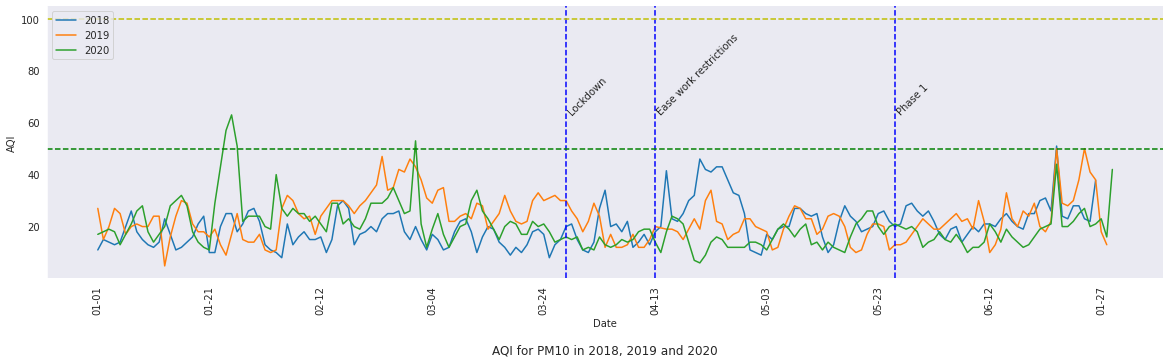

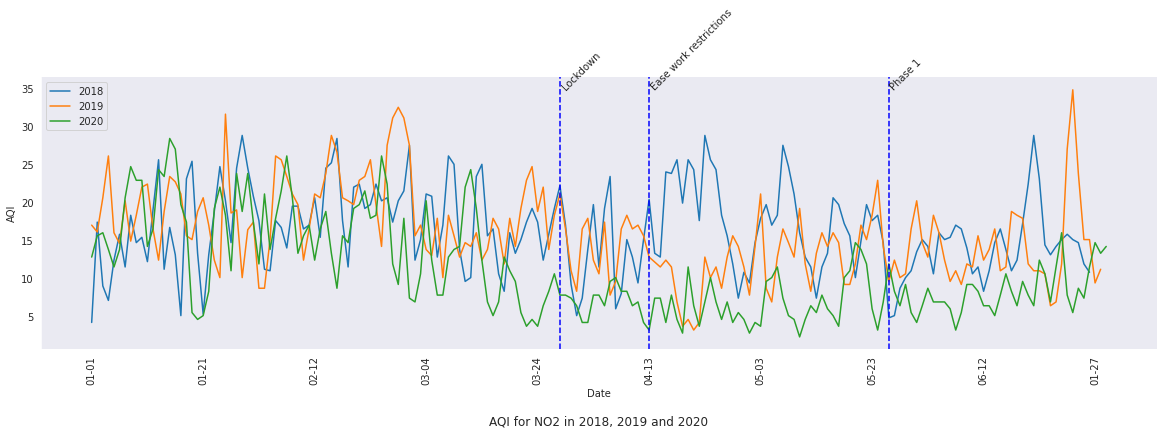

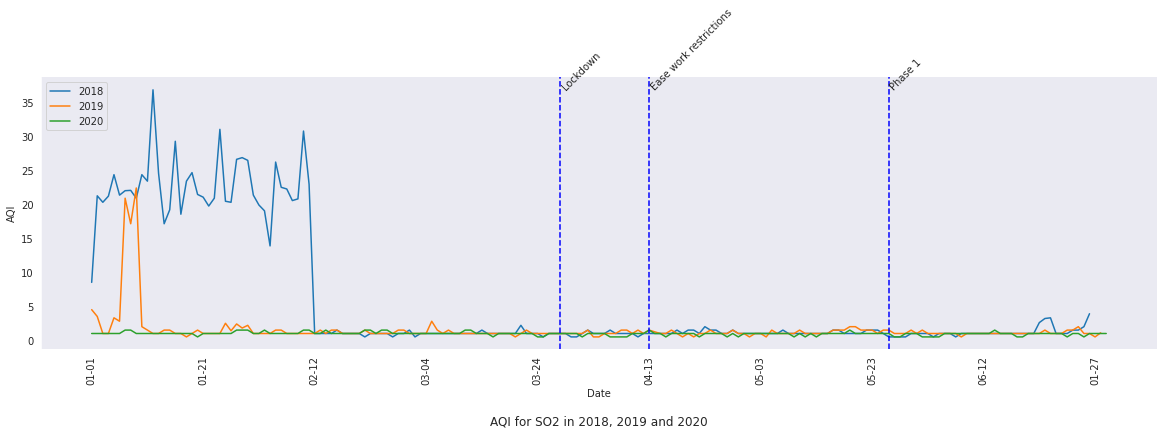

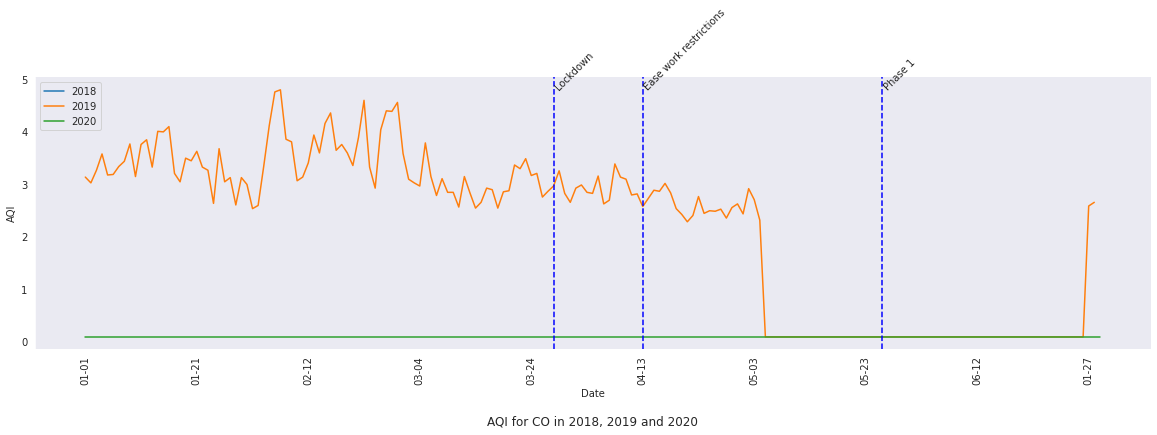

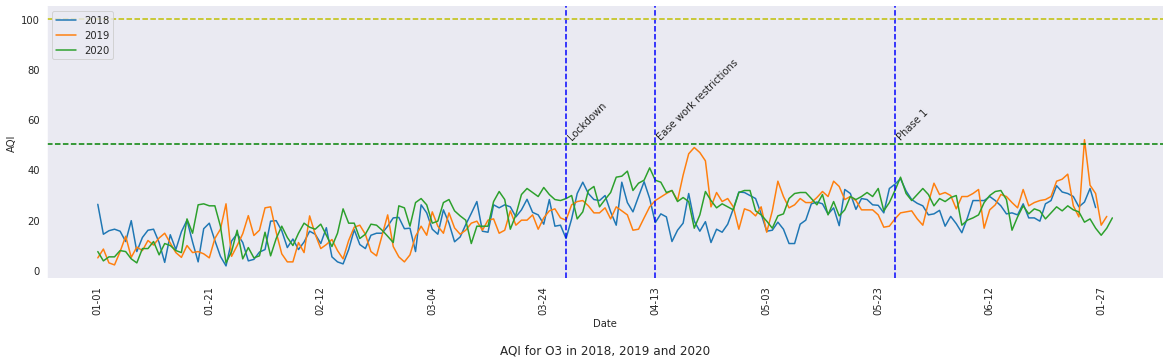

In [ ]:
plotting_function(barcelona_18, barcelona_19, barcelona_20, ['avg_pm10', 'avg_no2', 'avg_so2', 'avg_co', 'avg_o3'], ['03-28', '04-13', '05-26'], ['Lockdown', 'Ease work restrictions', 'Phase 1'])

-	PM10: was always around the levels of the earlier years and went down in the Lockdown and continued till it raises in the second half of the easing work restrictions back up again, but stays overall still lower than in earlier years
-	NO2: all the years large fluctuations in short time periods, but the levels went actually significantly lower shortly before the lockdown (declaration of State of alarm the reason?) , but stayed down during all phases with shorter fluctuations/amplitudes. In phase 1 it starts a rising trend, still with shorter amplitudes 
-	So2: almost similar to 2019 values, but in general very low values
-	CO: no data for 2018 and 2020 values roughly over 0
-	O3: no significant difference, stays almost always above the levels of 2019

### Data Analysis Bogotá

Bogotá is the capital and largest city of Colombia, it's located at 2,640 meters above sea level, which gives the city an average temperature of 14.5°C with variations between 4°C and 19.7°C. It has two seasons, the dry season that happens in December, January, July and August and the rain season that happens in April, May, September, October and November. It has a population over 8 million people. Bogotá growth has placed a strain on its roads and highways, which increases traffic congestion and the amount of pollutants emitted in the atmosphere. The city also has an industrial area inside the city, located at the south west of the city, being the most polluted area of the city.

The city adopted the same measures than the national government to control the advance of the COVID pandemic. The first case in the city was reported on March 6th.

**Timeline of the Covid-19 measures taken in Bogotá**

* March 17th: Mandatory isolation for all adults over 70 years of age from March 20th until May 31
* March 20th: Lockdown in the country from March 24th until April 12th
* March 24th: Lockdown starts
* April 6th: Lockdown is extended until April 26th
* April 20th: Lockdown is extended until May 11th. Instructions are established to ease working restrictions in the manufacturing and construction industry from April 27th, but then the opening moves until May 2nd
* May 2nd: Manufacture and Construction industries begin to work, "Smart Opening" starts
* May 5th: Lockdown is extended until May 25th
* May 27th: Lockdown is extended until July 1st
* May 30th: Bogotá implement a lockdown in the Kennedy neighborhood from June 1st until the 14th, then is extended until the 30th
* June 1st: Some economic and industry sectors reopen gradually
* June 21th: Lockdown is extended until July 15th
* July 28th: Lockdown is extended until August 30th, but instructions are made to reopen towns and cities with low affectation by Covid-19
* August 30th: Lockdown ends at midnight, but some measures are kept to contain the spread of the virus
* September 1st: Selective opening, people with symptoms or those whose family has symptoms have to stay in quarantine

In summary there are four important dates in the timeline
* March 24th: Lockdown Start
* May 2nd: Smart Opening
* June 1st: Economic Sectors Opening
* September 1st: Selective Opening

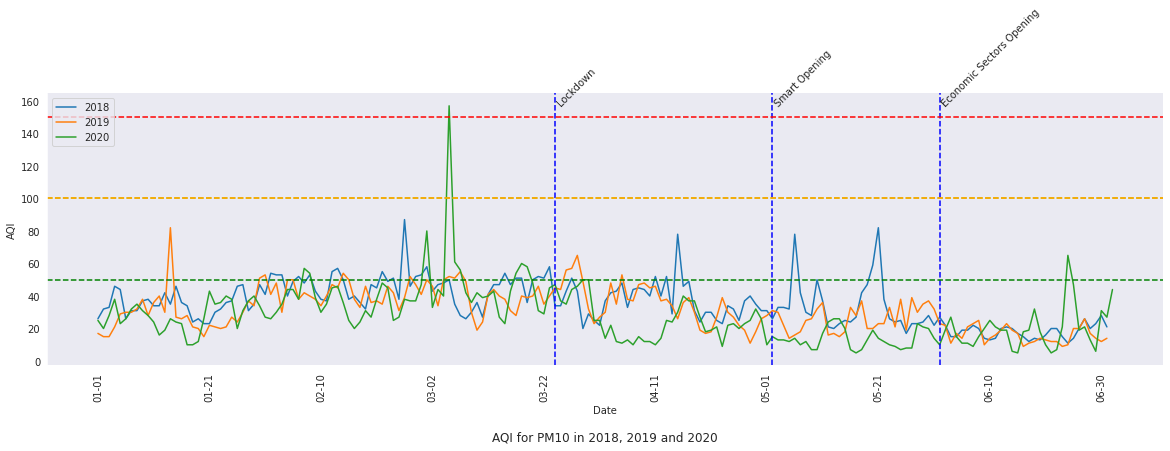

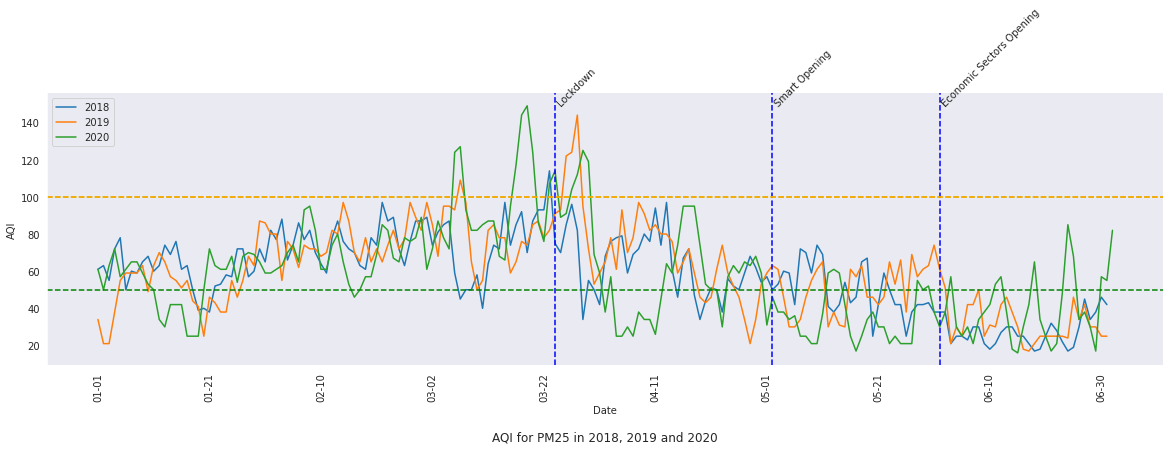

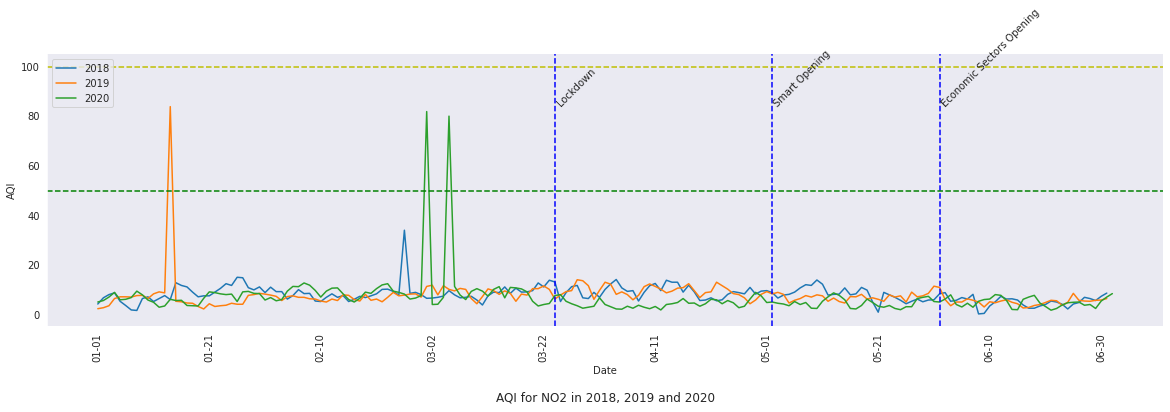

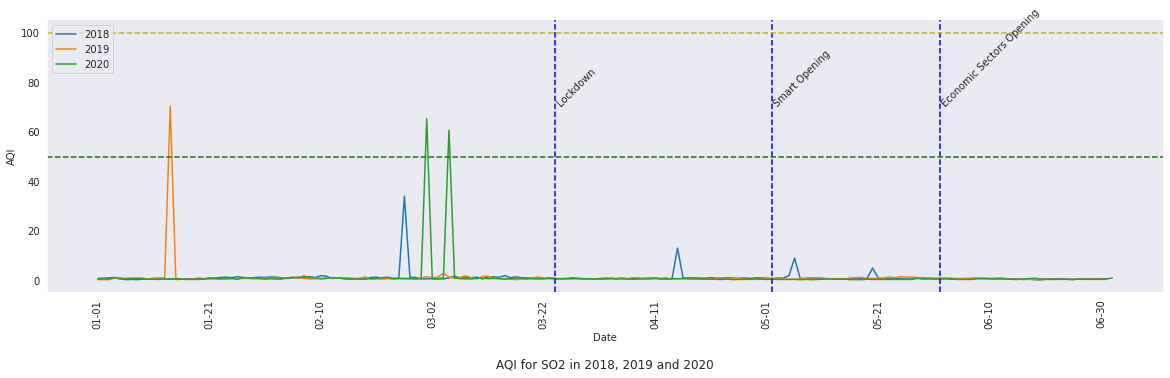

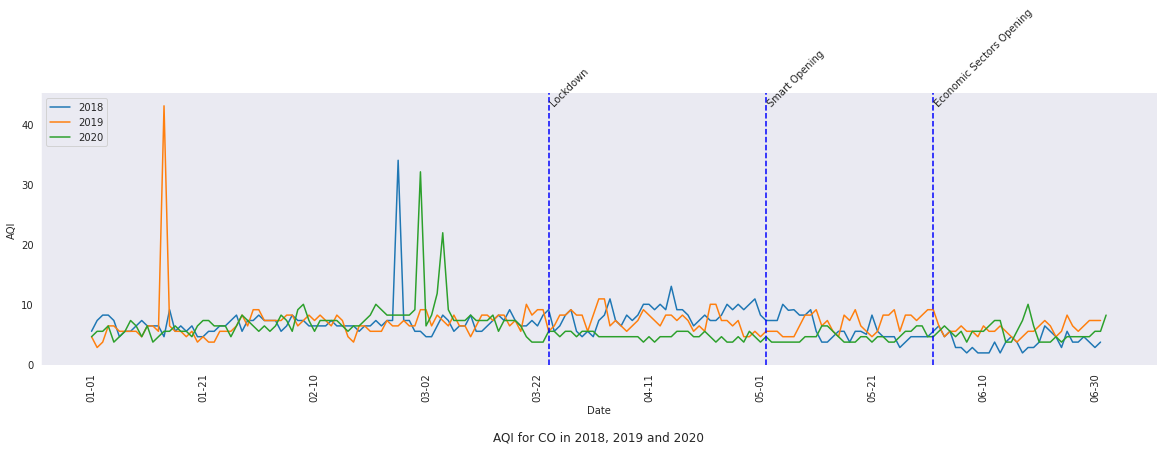

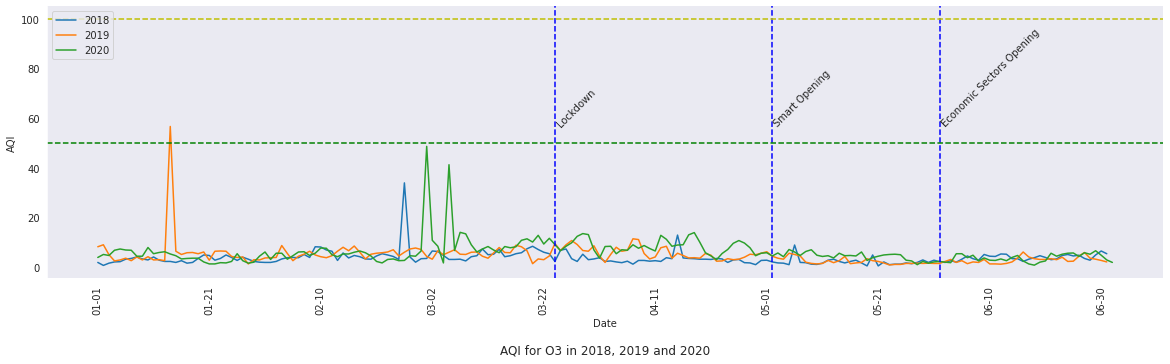

In [ ]:
plotting_function(bogota_18, bogota_19, bogota_20, ['avg_pm10', 'avg_pm25', 'avg_no2', 'avg_so2', 'avg_co', 'avg_o3'], ['03-24', '05-02', '06-01'], ['Lockdown', 'Smart Opening', 'Economic Sectors Opening'])

-	PM10: went significantly down a few days into lockdown, raised shortly at a every year peak around 04-15 (reason?) but went down again and stayed lower than earlier years till the beginning of opening the economic sector. It still stayed down after that, but in earlier years the values went down too at this time so it around normal, with surprising high fluctuations around mid-June, where it went way higher than earlier years
-	PM2.5: all years large fluctuations in short time periods, went down with lockdown even lower than the general declining trend over the years in this time, with an extreme high rise over a week inside lockdown (way above earlier years). In Smart opening overall lower than earlier years, in the economy opening larger fluctuation than usual and in general higher values
-	NO2: in lockdown significantly lower than usual, starts to align with earlier years during smart opening and is aligned in economy opening phase
-	CO: stayed significantly lower than usual during of lockdown, stayed around the level during smart opening, overall small declining trend in June did not happen in 2020 which falls together with the economy opening 
-	O3: was surprisingly little higher than earlier years during lockdown and smart opening, at the beginning of the year and in economy opening it was around the levels of earlier years 


### Data Analysis Münster

Münster is the 20th biggest city in Germany, located in the Mid-West, northern of the heavy industrial region "Ruhrgebiet" and in contrast to that quite countryish. Economically it has always been a trading and service city surrounded by its agricultural region "Münsterland". Münster is 60 m above sea level, with an average temperature of 9,8°C and its 189 rain days, but often with only little water volumes. Around 311,000 people live in the city and the traffic is mostly traveling to work into the offices and normal living. The city is known for its many bike users. 

Timeline of the Covid-19 measures taken in Münster:
- March 17th: Schools, kindergarten and some businesses closed
- March 22nd: Strict rules/lockdown (only necessary every-day businesses were allowed to open)
- April 20th: Slowly liftin of regulations and reopening of many shops over the next few weeks (economy restarts)
- June/ July/ August: Meeting up publicly with 5/10 people allowed, weddings etc. with later up to 150 people 
- August: Schools reopen


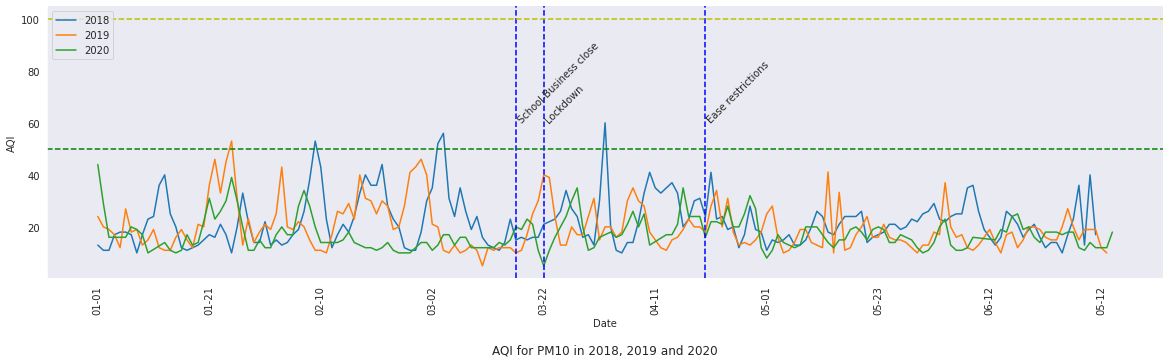

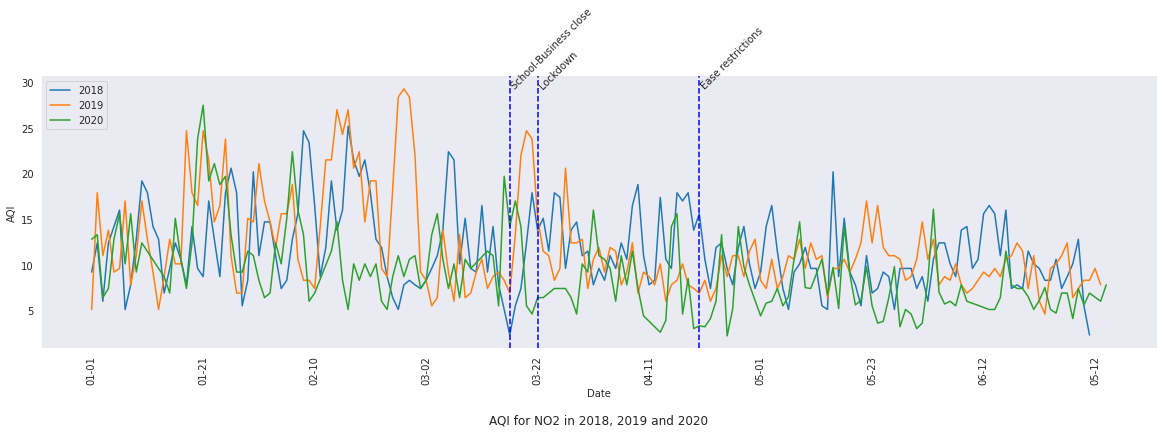

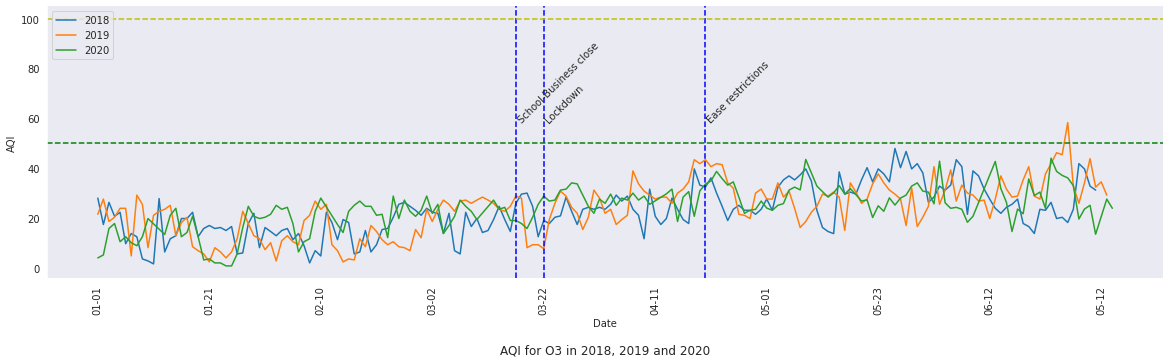

In [ ]:
plotting_function(münster_18, münster_19, münster_20, ['avg_pm10', 'avg_no2', 'avg_o3'], ['03-17', '03-22', '04-20'], ['School-Business close', 'Lockdown', 'Ease restrictions'])

-	PM10: massively declined at the implementation of lockdown, but went up to around “normal” shortly after a few days,  minimal lower than in earlier years and shorter fluctuations, but no significant effect  as in other cities, more difference to earlier years and less fluctuation begins in the middle of the easing restrictions as some  surrounding butcheries need to be still closed due to Covid19 cases in their company and workers still prefer home office, leading to less traffic
-	NO2: overall large fluctuations in short time periods, levels went down a month pre-lockdown, raised up shortly bevor and went down significantly during the first days of lockdown, constantly fluctuating back to normal and down again, but with lower top-peaks  and lower bottom-peaks. Went back to normal with easing restrictions and were lower again in the second half of easing. Average over the phases is probably a bit lower than in earlier years, but no significant impact because of the fluctuations
-	03: no significant difference 


### Data Analysis Paris



Paris is the capital of France and the most populous city with an estimated population around 2,1 mio. (2,148,271 as of 2020). Its area amounts to 105 square kilometers. Furthermore it builds the center as well as the seat government of Île-de-France (Paris Region), making up 18% of the French population. Paris is dominated by major railways (six railways in Paris: Gare du Nord is the busiest railway of Europe), highways and airports (2 airports: Charle-de-Gaulle and Paris-Orly). The Charle-de-Gaulle airport is the second busiest airport in France. Paris's economic sectors portfolio doesn't contain heavy industry like steel industry. Regarding tourism, the French capital has a lot of visitors around all seasons. It's the second most visited city in 2019. Paris's climate is continental and therefore it's mild. The city has four seasons: spring, summer, autumn and winter. The daily average highs range from 8°C in the winter to 25°C in the summer. The summer season starts normally at the beginning of June and ends in mid-september. Contrarily, the winter is characterized by coldness as well as cloudness and is from mid-november until the start of march. Also, it's quite rainy in Paris. The rain precipitation is even higher than in London.

The French capital had one lockdown phase from mid-march until mid-june, which was implemented by the French government with the aid of the health emergency. Such a situation allows the government to establish curfews in a French city. Apart from the lockdown,Paris living as well as economical situation is far away from normal. Residents still need to wear face coverings and homeoffice is preferred by the goverment. Furthermore, cafes,bars and restaurants either need to consider opening restrictions or the owner need to close its shop.

Timeline of the Covid-19 measures taken in Paris:

 - March 17th: Official start of lockdown, stated by the State of Health Emergency
 - June 14th: Cafes, Restaurants and Pubs were allowed to reopen in Paris

- July 10th: Official end of lockdown, stated by the State of Health Emergency and ease of restriction and social distancing

- July 28th: Face coverings in public spaces

- October 5th: Second wave, more restrictions: closing of pubs, restaurants and cafes, but no second lockdown

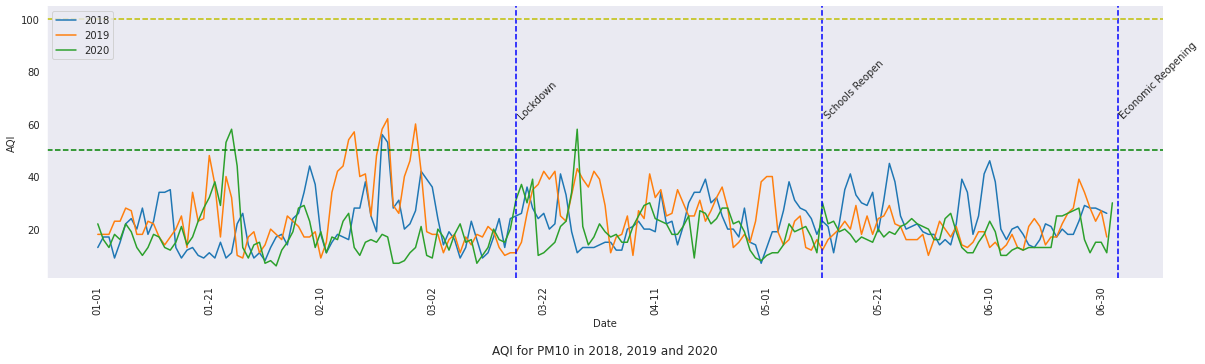

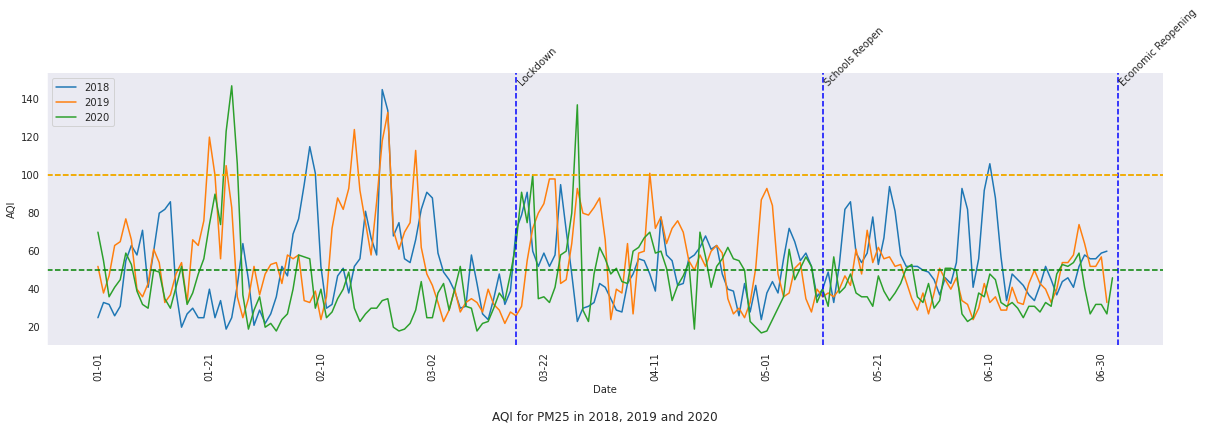

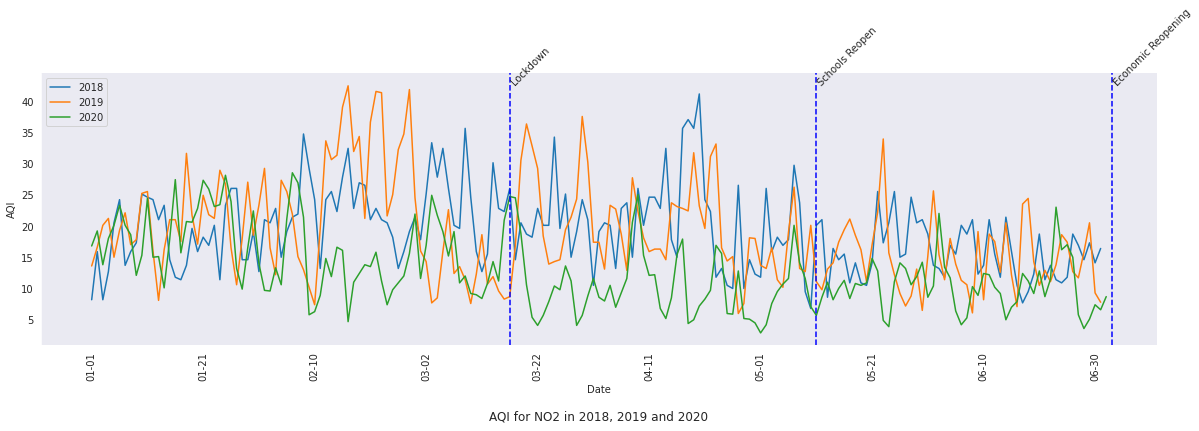

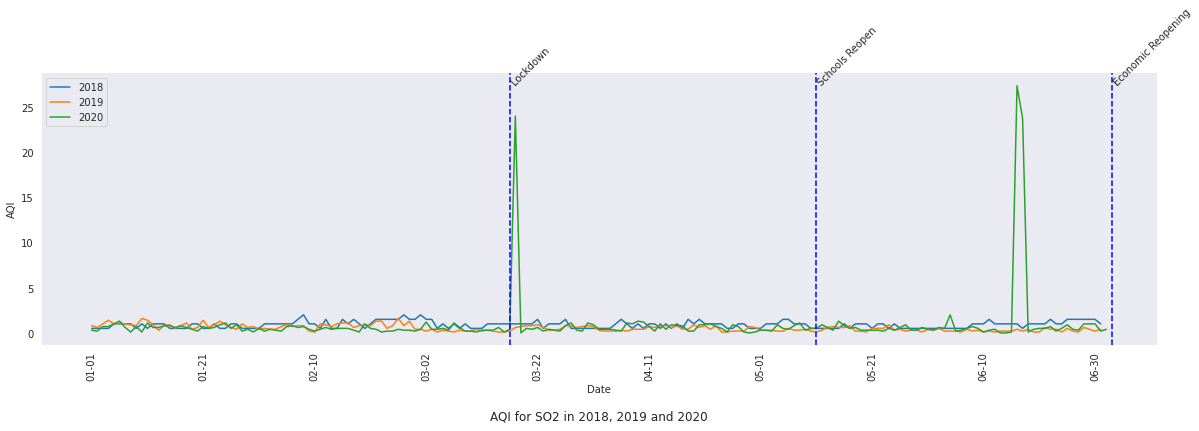

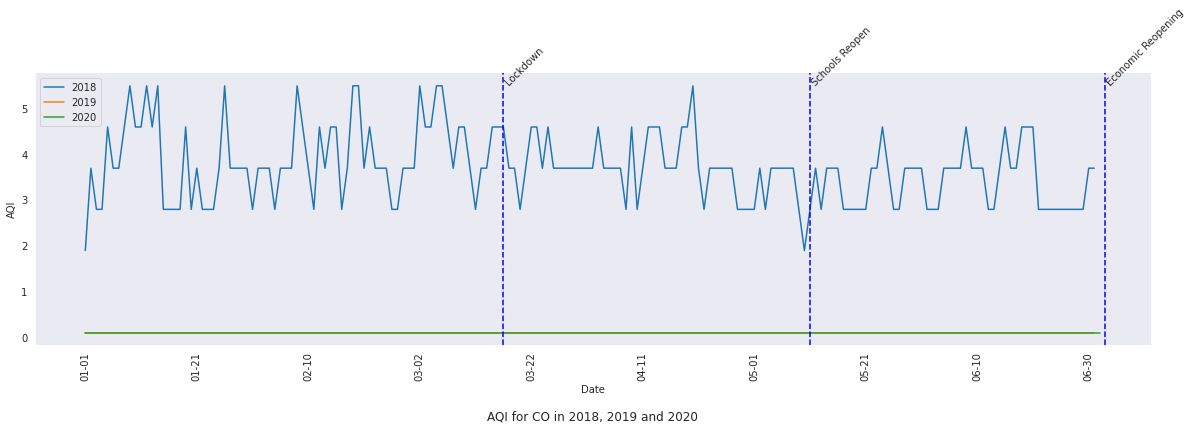

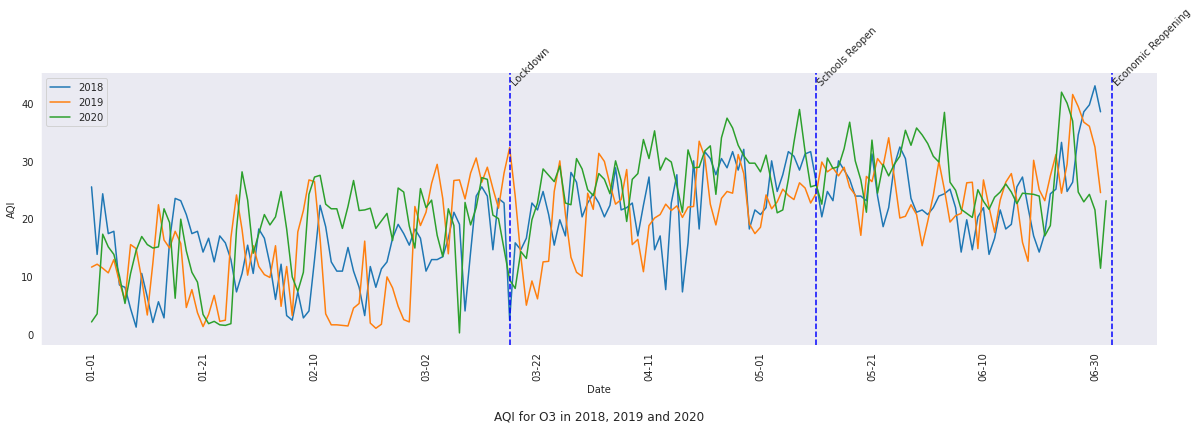

In [ ]:
plotting_function(paris_18, paris_19, paris_20, ['avg_pm10', 'avg_pm25', 'avg_no2', 'avg_so2', 'avg_co', 'avg_o3'], ['03-17', '05-11', '14-06',], ['Lockdown', 'Schools Reopen', 'Economic Reopening'])

-	PM10: was the entire February significantly lower than the earlier years, but during lockdown kind of similar to the earlier years with more fluctuation, maybe on average a bit less than earlier years with lower peaks since 2 weeks into lockdown, in the schools reopening phase it was constantly lower than 2019 more around the line of 2018 
-	PM2.5: same as PM10, low for the February and similar to earlier years during lockdown with a significant peak around the 1st April. In the school reopening phase before, the economy reopening the values were significantly lower than 2019 and on average a little under 2018
-	NO2: February significantly lower, stays lower since lockdown, earlier years have a declining trend from may on, which is not visible in 2020 but the levels are still below earlier years
-	SO2: generally, no difference but at very beginning of lockdown and one time in school reopening phase a huge peak, which are not seen in the entire earlier years at all
-	CO: wired baseline at around 0 for the entire year 2020
-	O3: overall the level is the entire time higher than earlier years, but even since beginning of February


### Data Analysis Stockholm

Stockholm is the capital of Sweden and the most populous area of Sweden. Its population amounts to over 1.6 millions in 2020. Stockholm is the seat of the Swedish government and most of its agencies, including highest courts in the judiciary as well as the official residencies of Swedish monarch and Prime Minister. Sweden's capital streches across fourteen islands and the Lake Mälaren flows into the Baltic Sea. Stockholm has an extensive public transport system: Stockholm Metro, Stockholm commuter rail, light rail/ tramway and ferry lines. Additionally, it is surrouned by four airports. Nevertheless, Stockholm won the European Green Capital Award by the EU Commission in 2010 as it possesses 216 natural reserves and 1.000 green spaces, to which 30% belongs to the city center. Furthermore, Sweden's capital has a congestion pricing system. According to this system, the people need to pay congestion tax if they enter a congestion zone like the city center with a car. Regarding the climate, the humid continental climate is in the 0°C isotherm and the oceanic climate is in the -3°C isotherm. The winters are cold, whereas the summers are mild. Precipitation is present throughout the year. Concerning economy, Stockholm is like other Swedish cities export oriented. The main industries belong to the tertiary sector. 

The government emphasized the personal responsibilty rather than implementing major lockdowns to contain the spread of the Coronavirus. Only office workers were asked to work from home, if possible.

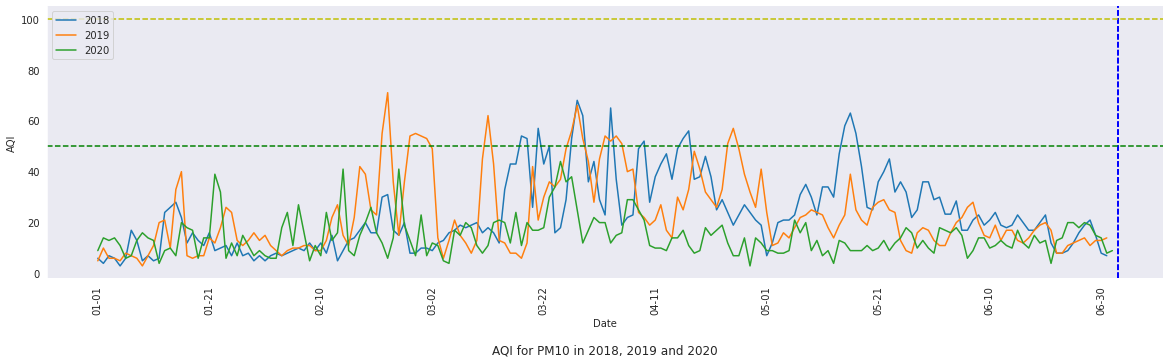

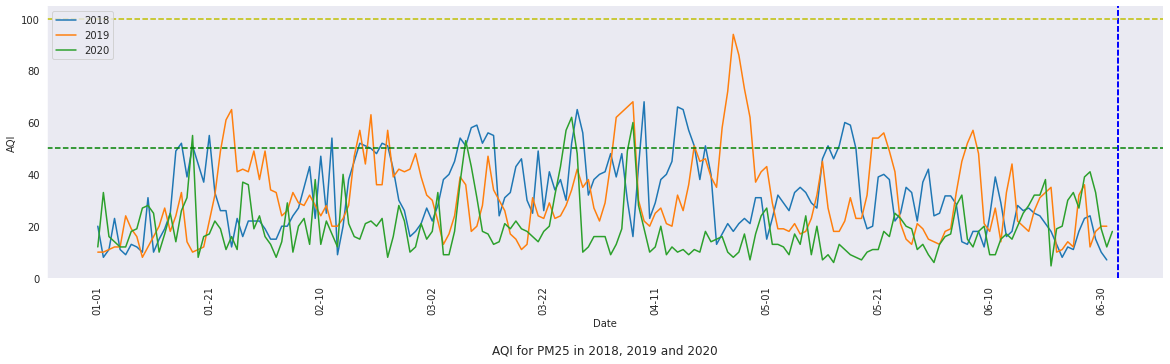

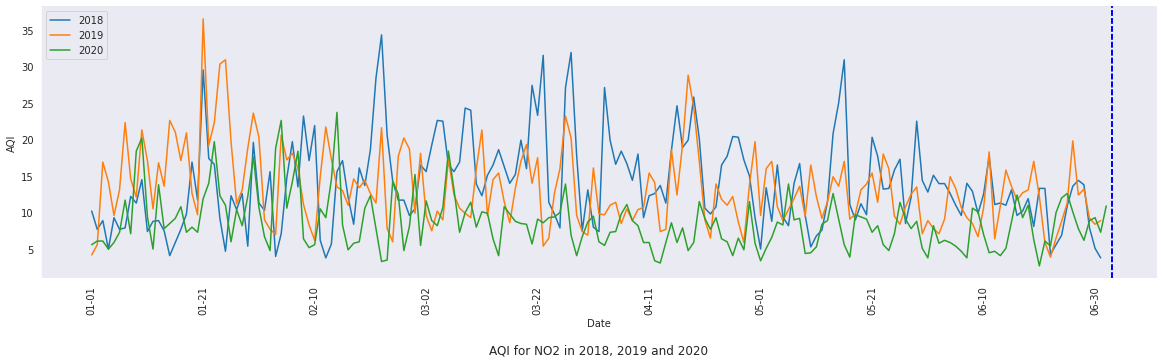

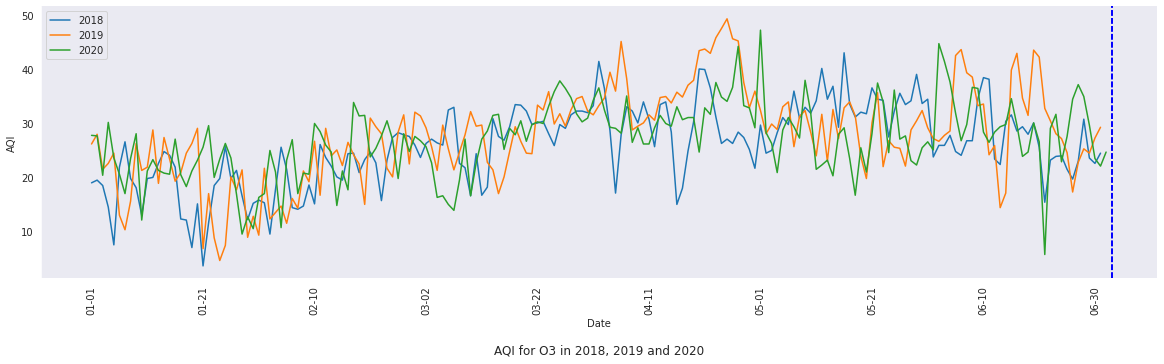

In [ ]:
plotting_function(stockholm_18, stockholm_19, stockholm_20, ['avg_pm10', 'avg_pm25', 'avg_no2', 'avg_o3'], ['', '', '',], ['', '', ''])

-	PM10: at beginning of the year on the same height as the earlier years but stayed low instead of the increasing trend of the earlier years beginning around February/March. Therefore, a significantly difference since March, but no lockdown at all (reason?)
-	PM2.5: same as for PM10 was lower in February and went down significantly in April and May, got back up to earlier years in June without a lockdown
-	NO2: same as for the other parameters, significantly down without lockdown
-	O3: is about the same as in earlier years


### Data Analysis Stuttgart


There was never a lockdown in Stuttgart during the spread of the Coronavirus. The regional government implemented only restriction and social distancing measures to contain the spread of the Covid19-Virus.

march 23th: Restrictions: closing of kindergartens, schools, universities and public institutions and no participation at events

april 24th: Face covering are mandatory to wear in indoor places, including public transportation

may 8th: Ease of restrictions: museum openings

june 29th: Ease of restrictions: regular business in kindergartens

october 7th: Restrictions of private celebrations (<25 participants)

october 14th: More restrictions again due to more Covid19 infections: wearing of face coverings is mandatory in the city-circle (city center), time restrictions regarding the serving of alcoholic drinks in pubs etc., people restrictions concering soccer games and other events


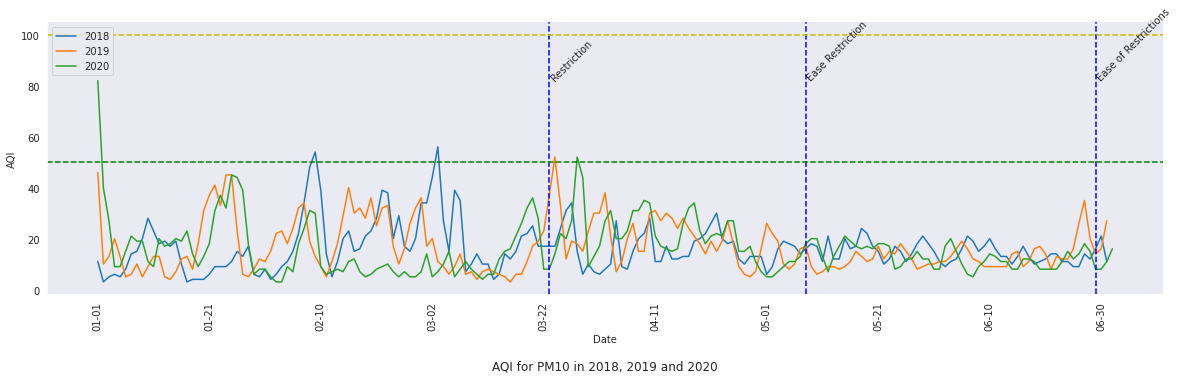

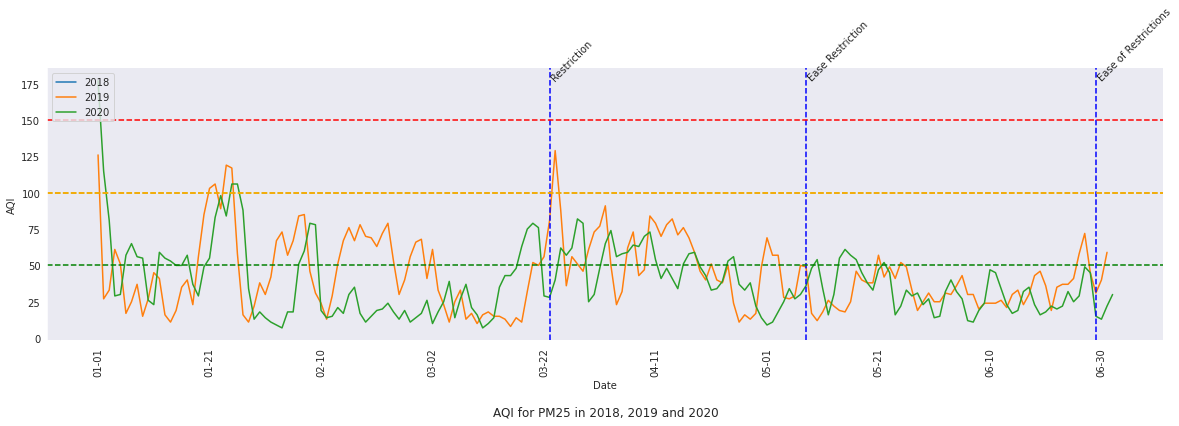

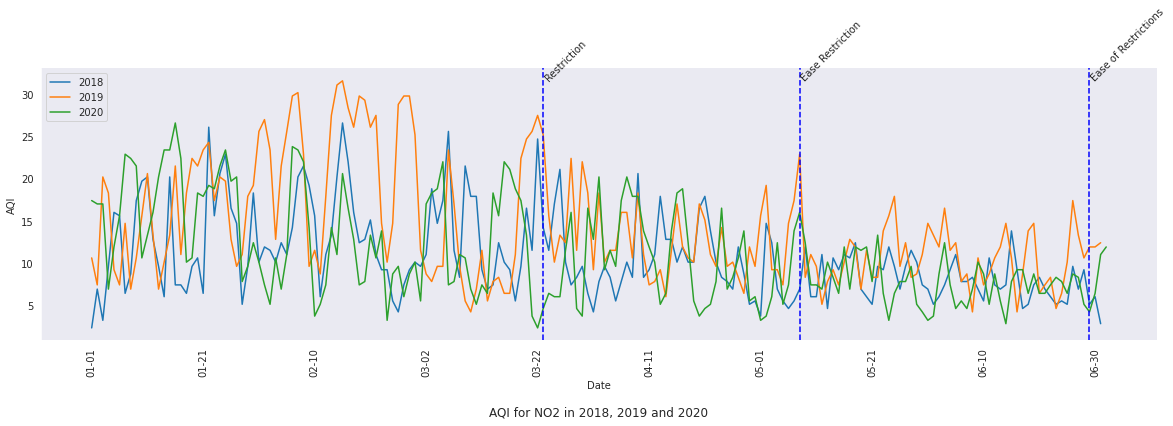

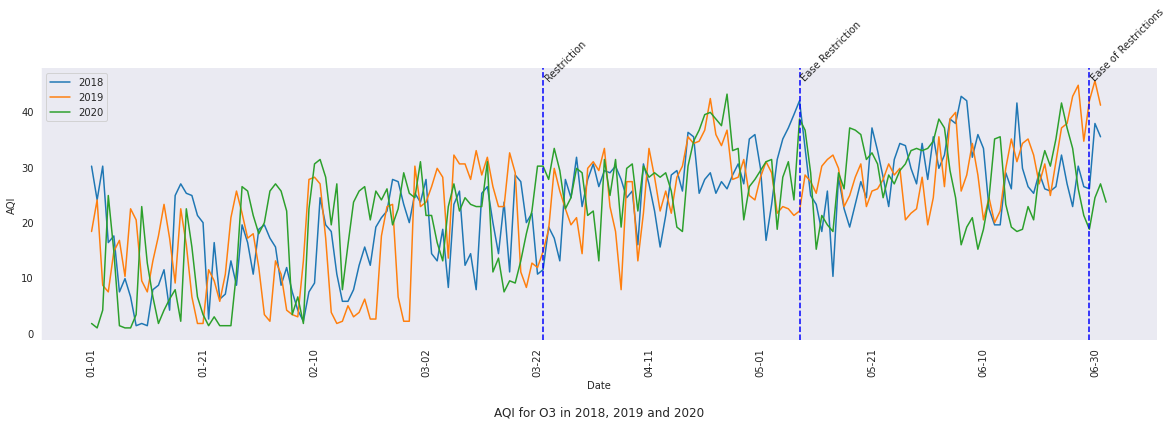

In [ ]:
plotting_function(stuttgart_18, stuttgart_19, stuttgart_20, ['avg_pm10', 'avg_pm25', 'avg_no2', 'avg_o3'], ['03-23', '05-08', '06-29',], ['Restriction', 'Ease Restriction', 'Ease of Restrictions'])

-	PM10: no visible difference since beginning of lockdown, but was significant lower in February
-	PM2.5: same es PM10, no difference other than February before lockdown
-	NO2: no difference between the years during restrictions as some companies like Bosch changed their product type and produced face masks etc. and restriction values are impacted by unfavorable air exchange, caused by weather conditions
-	O3: no difference between the years during restrictions as some companies like Bosch changed their product type and produced face masks etc. and restriction values are impacted by unfavorable air exchange, caused by weather conditions


## Predictions

To make the predictions we used two methods. First we used the SARIMAX model to predict the future pollution levels using time as basis of calculation. The second method was a random forest using weather variables to predict PM2.5 and PM10 (as some cities doesn't measure PM2.5) in each city. We made a function for each method.

### SARIMAX

To make the SARIMAX prediction we developed two functions, the first one gives the pdq values for each city using the function auto_arima from pmdarima library. The second one makes the prediction and prints two plots, the first one is the entire timeseries used to predict with the prediction in a red line, while the second one shows only the prediction.

In [ ]:
def find_order(city_19, city_20, pollutant):
    #This function helps to find the pdq values for the SARIMAX model
    #city_19 and city_20 are the 2019 and 2020 dataframes
    #pollutant is the pollutant to predict

    from pmdarima import auto_arima
    time = pd.date_range(start='2018-12-31', end='2020-10-05', freq='D')
    city_tot = pd.concat([city_19, city_20])
    city_tot = city_tot[~city_tot.index.duplicated()]
    city_tot.reindex(time)
    city_tot = city_tot['2019-01-01':'2020-10-05']
    auto = auto_arima(city_tot['avg_pm10'])
    return auto

def sarimax_predictor(city_19, city_20, pollutant, order, date_start, date_end, n_days):
    #This function makes the prediction plot using SARIMAX
    #city_19 and city_20 are the 2019 and 2020 dataframes
    #pollutant is the pollutant to predict
    #order is the values we found with find_order in format (p, d, q)
    #date_start: date start to make the prediction ej: '2020-10-26'
    #date_end: date end to make the prediction ej: '2020-11-01'
    #n_days is the number of days to predict ej: 6
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    time = pd.date_range(start='2018-12-31', end='2020-10-05', freq='D')
    city_tot = pd.concat([city_19, city_20])
    city_tot = city_tot[~city_tot.index.duplicated()]
    city_tot.reindex(time)
    city_tot = city_tot['2019-01-01':'2020-10-05']

    model = SARIMAX(city_tot[pollutant], order=order, seasonal_order=(2,1,1,22))
    model_fit = model.fit()
    days_start = 643
    days_end = days_start + n_days
    prediction = model_fit.predict(start=days_start, end=days_end, dynamic=True)
    prediction_time = pd.date_range(start=date_start, end=date_end, freq='D')
    prediction_df = pd.DataFrame(prediction)
    prediction_df.set_index(prediction_time, inplace=True)

    
    fig = plt.figure(figsize=(20,6))
    fig.add_subplot(2,1,1)
    plt.plot(city_tot[pollutant])
    plt.plot(prediction_df.index, prediction, color='red')
    plt.show()
    fig = plt.figure(figsize=(20,6))
    fig.add_subplot(2,1,2)
    plt.plot(prediction_df.index, prediction, color='red')
    plt.show()

#### Prediction for Barcelona

In [ ]:
find_order(barcelona_19, barcelona_20, 'avg_pm10')

ARIMA(order=(2, 1, 1), scoring_args={}, with_intercept=False)

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


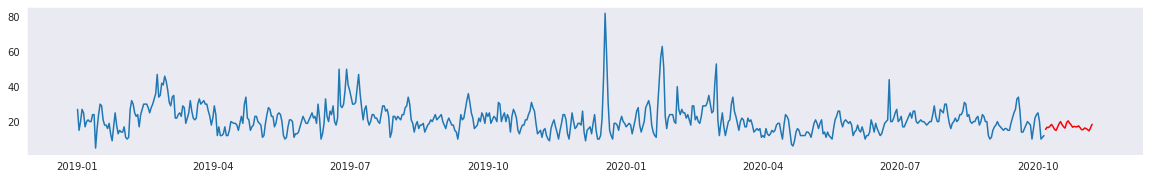

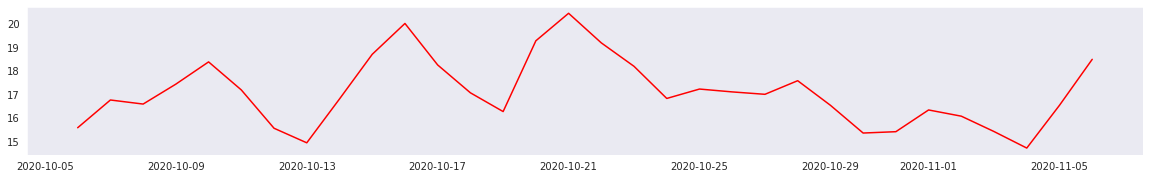

In [ ]:
sarimax_predictor(barcelona_19, barcelona_20, 'avg_pm10', (2, 1, 1), '2020-10-06', '2020-11-06', 31)

#### Prediction for Bogotá


In [ ]:
find_order(bogota_19, bogota_20, 'avg_pm25')

/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(0, 1, 3), scoring_args={}, with_intercept=False)

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


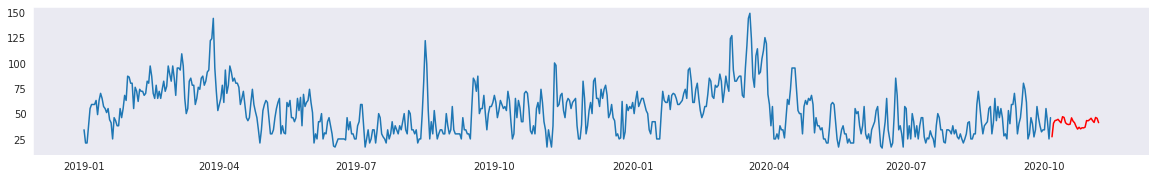

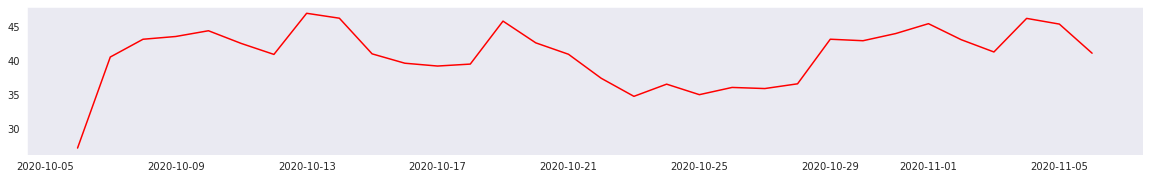

In [ ]:
sarimax_predictor(bogota_19, bogota_20, 'avg_pm25', (0, 1, 3), '2020-10-06', '2020-11-06', 31)


In [ ]:
find_order(bogota_19, bogota_20, 'avg_pm10')

/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(0, 1, 3), scoring_args={}, with_intercept=False)

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


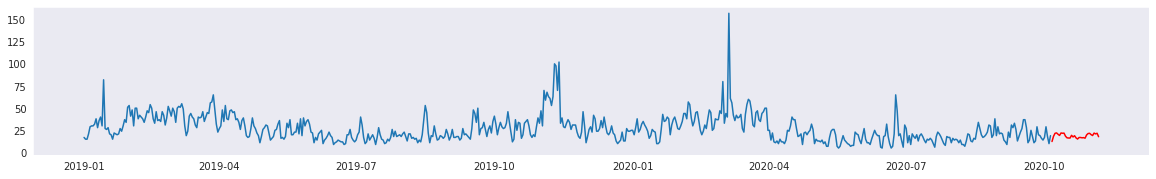

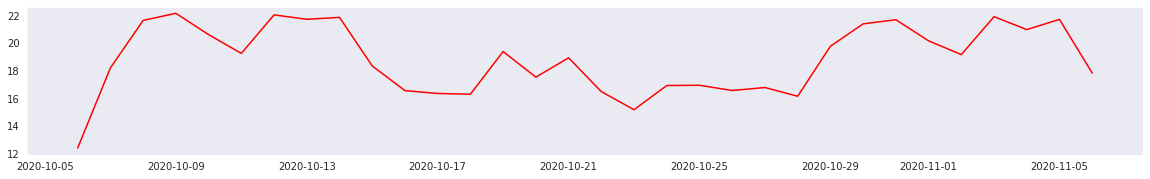

In [ ]:
sarimax_predictor(bogota_19, bogota_20, 'avg_pm10', (0, 1, 3), '2020-10-06', '2020-11-06', 31)

#### Prediction for Münster

In [ ]:
find_order(münster_19, münster_20, 'avg_pm10')


/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(2, 1, 2), scoring_args={}, with_intercept=False)

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/kal

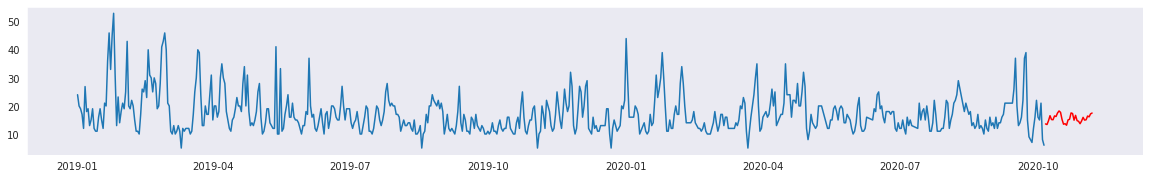

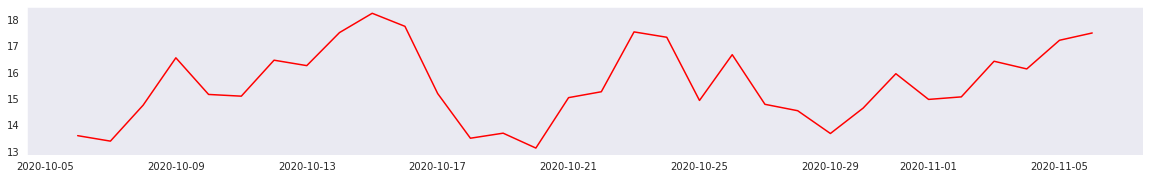

In [ ]:
sarimax_predictor(münster_19, münster_20, 'avg_pm10', (2, 1, 2), '2020-10-06', '2020-11-06', 31)

#### Prediction for Paris

In [ ]:
find_order(paris_19, paris_20, 'avg_pm25')

/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(1, 1, 4), scoring_args={}, with_intercept=False)

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


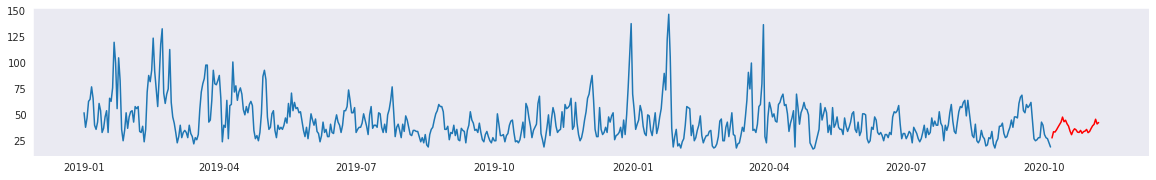

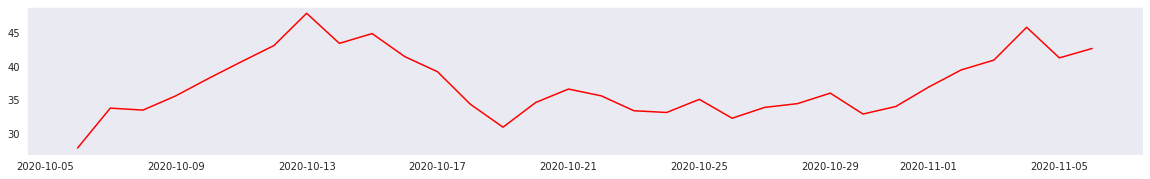

In [ ]:
sarimax_predictor(paris_19, paris_20, 'avg_pm25', (1, 1, 4), '2020-10-06', '2020-11-06', 31)

In [ ]:
find_order(paris_19, paris_20, 'avg_pm10')

/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(1, 1, 4), scoring_args={}, with_intercept=False)

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


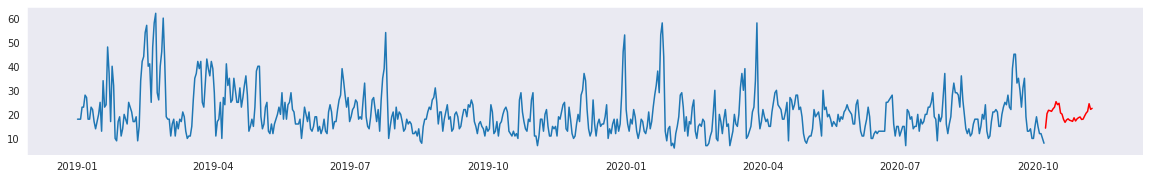

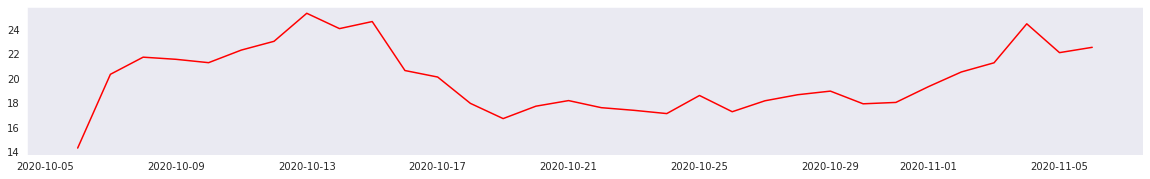

In [ ]:
sarimax_predictor(paris_19, paris_20, 'avg_pm10', (1, 1, 4), '2020-10-06', '2020-11-06', 31)

#### Prediction for Stockholm

In [ ]:
find_order(stockholm_19, stockholm_20, 'avg_pm25')

ARIMA(order=(0, 1, 3), scoring_args={}, with_intercept=False)

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


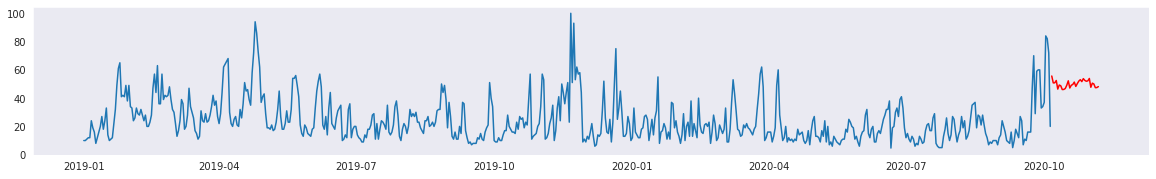

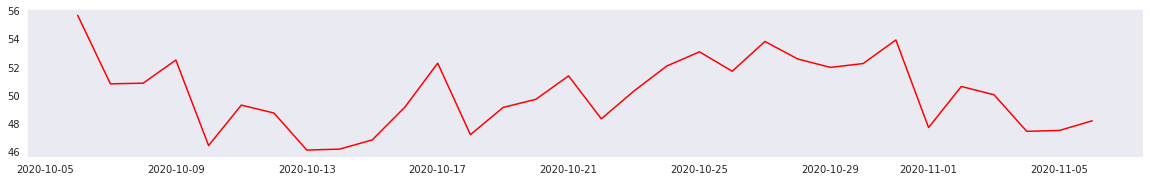

In [ ]:
sarimax_predictor(stockholm_19, stockholm_20, 'avg_pm25', (0, 1, 3), '2020-10-06', '2020-11-06', 31)

In [ ]:
find_order(stockholm_19, stockholm_20, 'avg_pm10')

ARIMA(order=(0, 1, 3), scoring_args={}, with_intercept=False)

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


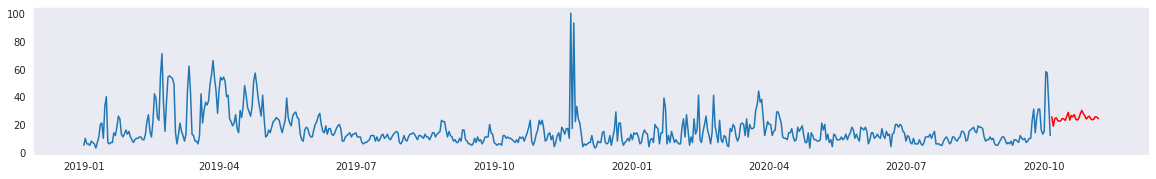

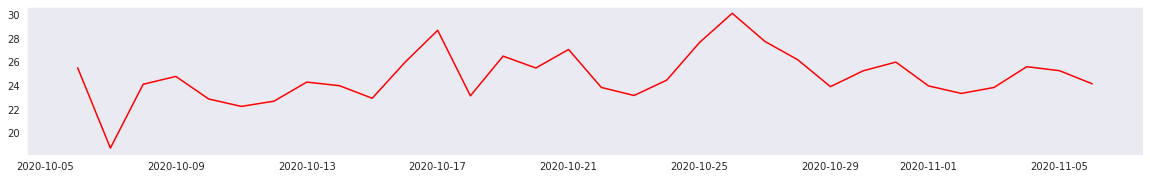

In [ ]:
sarimax_predictor(stockholm_19, stockholm_20, 'avg_pm10', (0, 1, 3), '2020-10-06', '2020-11-06', 31)

#### Prediction for Stuttgart

#### Prediction for Stuttgart

In [ ]:
find_order(stuttgart_19, stuttgart_20, 'avg_pm25')

/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(1, 0, 2), scoring_args={})

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


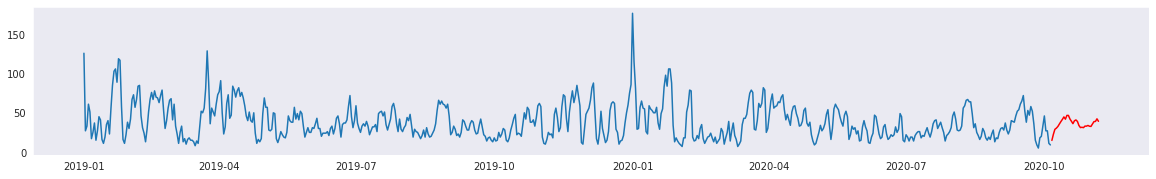

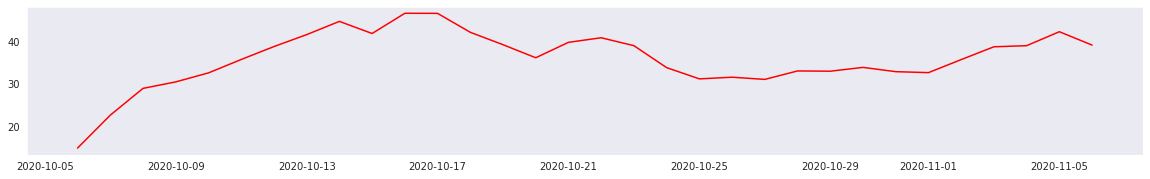

In [ ]:
sarimax_predictor(stuttgart_19, stuttgart_20, 'avg_pm25', (1, 0, 2), '2020-10-06', '2020-11-06', 31)

In [ ]:
find_order(stuttgart_19, stuttgart_20, 'avg_pm10')

/opt/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(1, 0, 2), scoring_args={})

/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


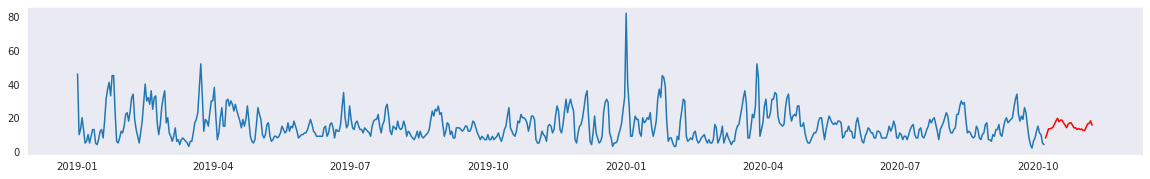

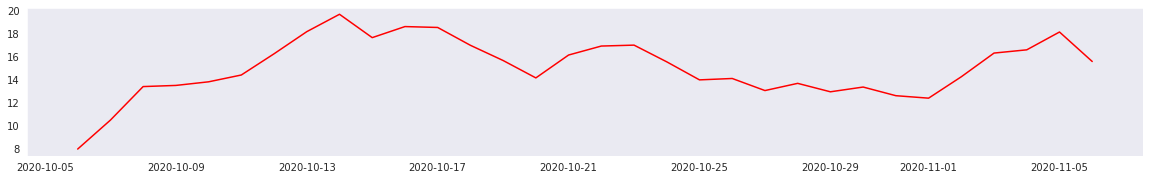

In [ ]:
sarimax_predictor(stuttgart_19, stuttgart_20, 'avg_pm10', (1, 0, 2), '2020-10-06', '2020-11-06', 31)

### Random Forest

We tested different surpervised learning algorithms and random forest was the one that gave us the best results. Then we used a Randomized Search Cross Validation to do a hyperparameter optimization. The next table shows the hyperparameters and its values used in each city. We developed two functions the first one makes the AQI prediction using the next parameters: **City**, **Average humidity**, **Minimum Temperature**, **Maximum Temperature**, **Wind Speed**, **Average (Maximum) precipitation**. Some cities doesn't have data about precipitation, in that case the value for precipitation is 0 and the function was written to avoid that feature. The second one prints the predicted value and recomendations for each AQI level.

|City|n_estimators|min_samples_split|min_samples_leaf|max_features|max_depth|bootstrap|Train Error|Test Error|
|:--:|:----------:|:---------------:|:--------------:|:----------:|:-------:|:-------:|:---------:|:--------:|
|Barcelona|90|70|10|sqrt|20|True|7,05|5,63|
|Bogotá|150|70|5|sqrt|70|False|10,21|6,88|
|Münster <br> Paris <br> Stockholm <br> Stuttgart|90|70|10|sqrt|20|True|6,07 <br>7.37<br>10.4<br>7.82|8.10<br>7.94<br>13.77<br>7.50|

In [ ]:
#AQI recomendations
def aqi_status(pred):
    if pred <= 50:
        print("AQI of {:.0f}, The air quality is good".format(pred[0]))
    elif pred > 50 and pred <= 100:
        print("""AQI of {:.0f}, The air quality reached the second level moderate. 
        Help influencing the quality for the next days by using public transportations, bike etc. and take only necessary rides. 
        To minimize your own health risk don´t do sports outside. If you have a respiratory or other air sensitive diseases stay 
        inside if possible or maybe wear a facemask outside.""".format(pred[0]))
    elif pred > 100 and pred <= 150:
        print("""AQI of {:.0f}, The air quality is unhealthy for sensitive groups! 
        Help influencing the quality for the next days by using public transportations, shared mobility, homeoffice etc. 
        For your own health stay inside if possible and maybe invest in air purifiers. 
        Don´t do sports outside. If you have a respiratory or other air sensitive diseases: This air is unhealty for you. 
        Stay inside, run air purifying systems and wear a facemask outside.""".format(pred[0]))
    elif pred > 150 and pred <= 200:
        print("""AQI of {:.0f}, This air is unhealthy! 
        Stay as much inside as possible and run air purifying systems. 
        Wear facemasks if you need to go outside and reduce your time outside to a minimum.""".format(pred[0]))
    elif pred > 200 and pred <= 300:
        print("""AQI of {:.0f}, This air is very unhealthy! 
        Stay inside and run air purifiying systems. 
        Wear a facemask and don´t go outside if not absolutly necessary.""".format(pred[0]))
    elif pred > 300 and pred <= 400:
        print("""AQI of {:.0f}, This air is hazardous! Stay inside and run air purifiying systems.""".format(pred[0]))
    elif pred > 400 and pred <= 500:
        print("""AQI of {:.0f}, This air is hazardous! Stay inside and run air purifiying systems.""".format(pred[0]))


#Predictions
def predictor(city, pollutant, avg_humidity, min_temp, max_temp, avg_ws, avg_prec, date):
    #city: city to predict
    #pollutant: to predict in avg_pollutant format
    #it's possible to predict another pollutant different than pm2.5, unless we did not have data
    #avg_humidity: Average humidity
    #min_temp: Minimum temperature predicted
    #max_temp: Maximum temperature predicted
    #avg_ws: Average wind speed predicted
    #avg_prec: Average precipitation or max precipitation
    #In case there's no data about precipitation use 0 and the model will not use it
    #date: date of prediction
    city = city.lower()

    if city == 'barcelona':
        city_tot = pd.concat([barcelona_19, barcelona_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed', 'avg_precipitation']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=90, min_samples_split=70, min_samples_leaf=10, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws, 'avg_precipitation':avg_prec}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)
    
    elif city == 'bogotá' or city == 'bogota':
        city_tot = pd.concat([bogota_19, bogota_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed', 'avg_precipitation']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=150, min_samples_split=70, min_samples_leaf=5, max_features='sqrt', max_depth=70, bootstrap=False, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws, 'avg_precipitation':avg_prec}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)

    elif city == 'münster' or city == 'munster':
        city_tot = pd.concat([münster_19, münster_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed', 'max_precipitation']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=90, min_samples_split=70, min_samples_leaf=10, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws, 'max_precipitation':avg_prec}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)

    elif city == 'paris' or city == 'parís':
        city_tot = pd.concat([paris_19, paris_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=90, min_samples_split=70, min_samples_leaf=10, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)

    elif city == 'stockholm':
        city_tot = pd.concat([stockholm_19, stockholm_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=90, min_samples_split=70, min_samples_leaf=10, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)

    elif city == 'stuttgart':
        city_tot = pd.concat([stuttgart_19, stuttgart_20])
        x_train = city_tot[['avg_humidity', 'min_temperature', 'max_temperature' ,'avg_wind-speed']]
        y_train = city_tot[pollutant]

        model = RandomForestRegressor(n_estimators=90, min_samples_split=70, min_samples_leaf=10, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
        model.fit(x_train, y_train)

        weather_values = {'avg_humidity': avg_humidity, 'min_temperature':min_temp, 'max_temperature':max_temp,
        'avg_wind-speed':avg_ws}
        tomorrow_df = pd.DataFrame(data=weather_values, index=[date])
        pred = model.predict(tomorrow_df)
        aqi_status(pred)

### Prediction for Barcelona

In [ ]:

#Barcelona prediction pm10
predictor('barcelona', 'avg_pm10', 64, 12, 20, 5, 0, '2020-24-10')

AQI of 18, The air quality is good


### Prediction for Bogotá

In [ ]:
#Bogotá prediction pm2.5
predictor('bogota', 'avg_pm25', 67, 13, 18, 1, 3, '2020-24-10')

#Bogotá prediction pm10
predictor('bogota', 'avg_pm10', 67, 13, 18, 1, 3, '2020-24-10')

AQI of 49, The air quality is good
AQI of 25, The air quality is good


### Prediction for Münster

In [ ]:
#Münster prediction
predictor('münster', 'avg_pm10', 85, 11, 15, 4, 0, '2020-24-10')

AQI of 15, The air quality is good


### Prediction for Paris

In [ ]:
#Paris prediction pm2.5
predictor('paris', 'avg_pm25', 74, 11, 17, 7, 0, '2020-24-10')

#Paris prediction pm10
predictor('paris', 'avg_pm10', 74, 11, 17, 7, 0, '2020-24-10')

AQI of 37, The air quality is good
AQI of 18, The air quality is good


### Prediction for Stockholm

In [ ]:
#Stockholm prediction pm2.5
predictor('stockholm', 'avg_pm25', 79, 3, 10, 4, 2, '2020-24-10')

#Stockholm prediction pm10
predictor('stockholm', 'avg_pm10', 79, 3, 10, 4, 2, '2020-24-10')

AQI of 28, The air quality is good
AQI of 14, The air quality is good


### Prediction for Stuttgart

In [ ]:
#Stuttgart prediction pm2.5
predictor('stuttgart', 'avg_pm25', 79, 8, 17, 3, 0, '2020-24-10')

#Stuttgart prediction pm10
predictor('stuttgart', 'avg_pm10', 79, 8, 17, 3, 0, '2020-24-10')

AQI of 27, The air quality is good
AQI of 11, The air quality is good
